In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import pipeline
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
import sklearn as skl
from sklearn import kernel_ridge
from sklearn import decomposition
from sklearn import discriminant_analysis
from imblearn import over_sampling
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import ensemble
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers

In [3]:
df = pd.read_csv('Fifa_23_Players_Data.csv')

In [4]:
df.drop(["Image Link", "Potential", "Full Name", "Club Jersey Number", "Release Clause", "Joined On", "On Loan", "Preferred Foot",
         "Club Name", "Contract Until", "National Team Name", "National Team Image Link", "National Team Position",
         "National Team Jersey Number", "Club Position", "Known As", "Positions Played", "Nationality"], axis=1, inplace=True)

In [5]:
df.head()

Overall  Value(in Euro) Best Position  Age  Height(in cm)  Weight(in kg)  \
0       91        54000000           CAM   35            169             67   
1       91        64000000            CF   34            185             81   
2       91        84000000            ST   33            185             81   
3       91       107500000            CM   31            181             70   
4       91       190500000            ST   23            182             73   

   TotalStats  BaseStats  Wage(in Euro)  Weak Foot Rating  ...  LM Rating  \
0        2190        452         195000                 4  ...         91   
1        2147        455         450000                 4  ...         89   
2        2205        458         420000                 4  ...         86   
3        2303        483         350000                 5  ...         91   
4        2177        470         230000                 4  ...         92   

   CM Rating RM Rating LWB Rating  CDM Rating  RWB Rating  LB Rating  \
0         88        91         67          66          67         62   
1         84        89         67          67          67         63   
2         83        86         67          69          67         64   
3         91        91         82          82          82         78   
4         84        92         70          66          70         66   

   CB Rating  RB Rating  GK Rating  
0         53         62         22  
1         58         63         21  
2         63         64         22  
3         72         78         24  
4         57         66         21  

[5 rows x 71 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17529 entries, 0 to 17528
Data columns (total 71 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Overall                   17529 non-null  int64 
 1   Value(in Euro)            17529 non-null  int64 
 2   Best Position             17529 non-null  object
 3   Age                       17529 non-null  int64 
 4   Height(in cm)             17529 non-null  int64 
 5   Weight(in kg)             17529 non-null  int64 
 6   TotalStats                17529 non-null  int64 
 7   BaseStats                 17529 non-null  int64 
 8   Wage(in Euro)             17529 non-null  int64 
 9   Weak Foot Rating          17529 non-null  int64 
 10  Skill Moves               17529 non-null  int64 
 11  International Reputation  17529 non-null  int64 
 12  Attacking Work Rate       17529 non-null  object
 13  Defensive Work Rate       17529 non-null  object
 14  Pace Total            

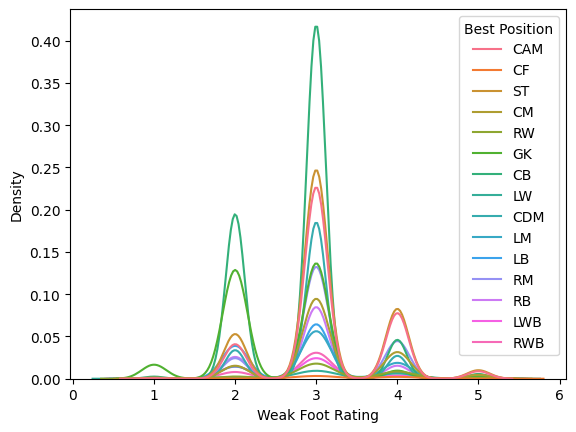

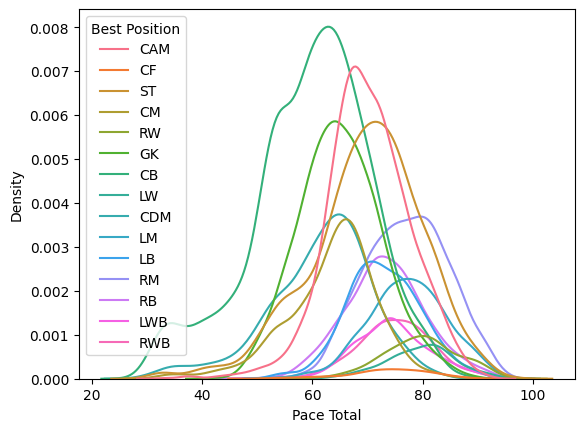

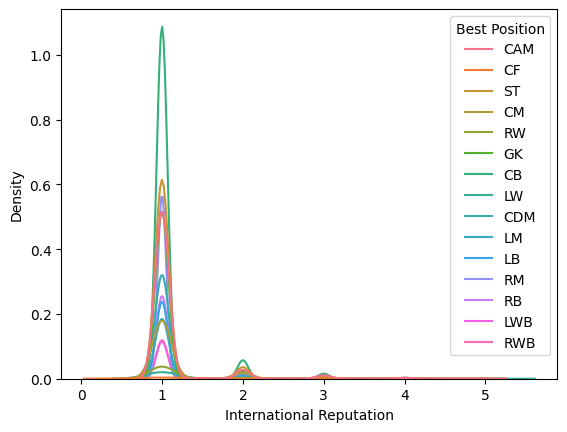

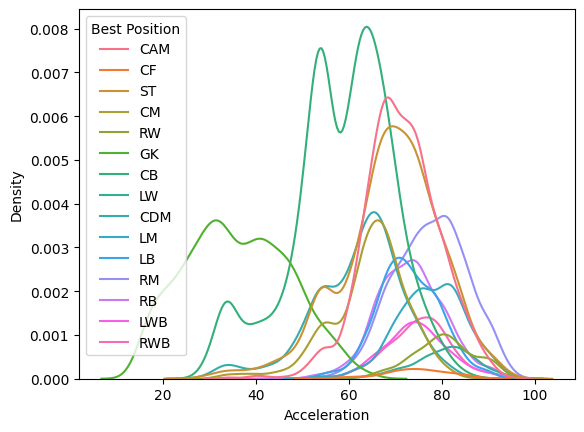

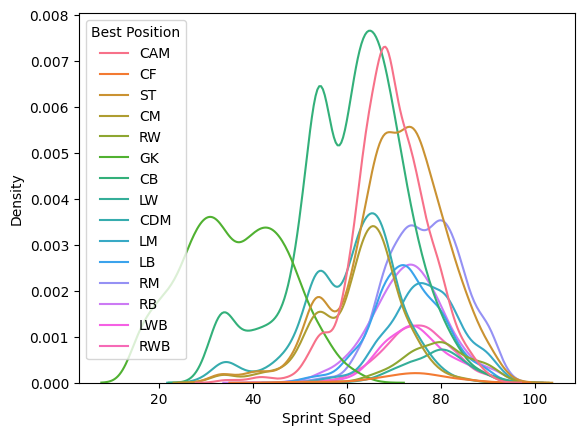

In [7]:
for col in ['Weak Foot Rating', 'Pace Total', 'International Reputation',
            'Acceleration', 'Sprint Speed']:
    plt.figure()
    sns.kdeplot(data=df, x=col, hue='Best Position')


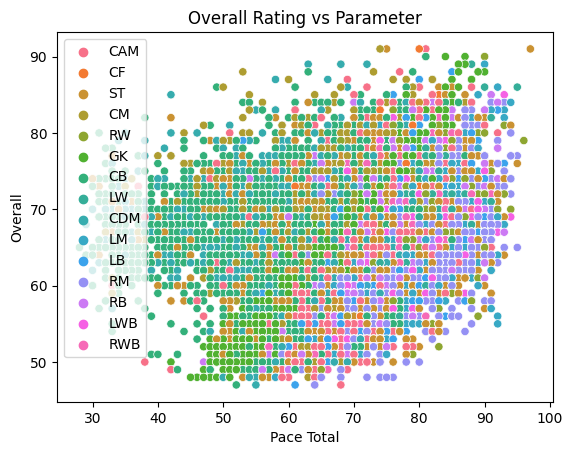

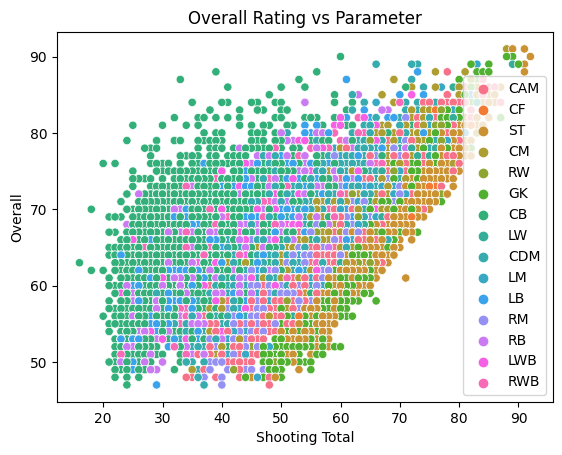

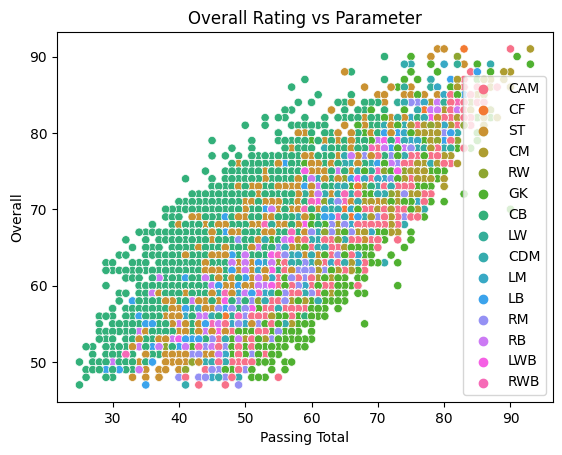

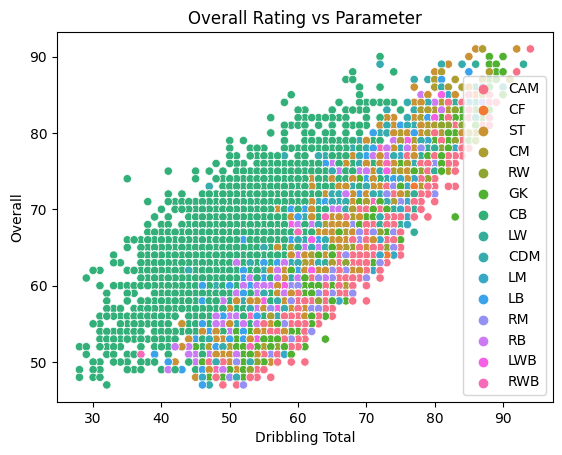

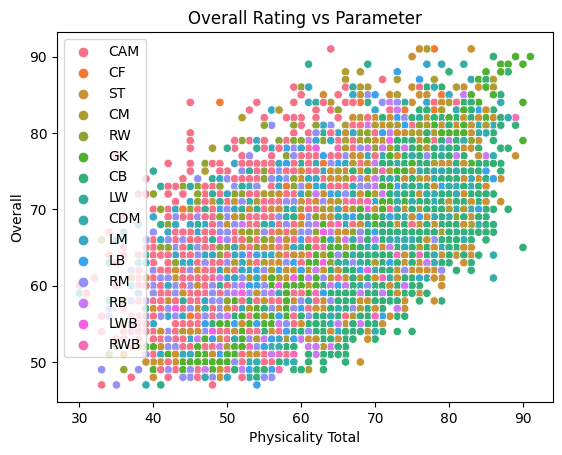

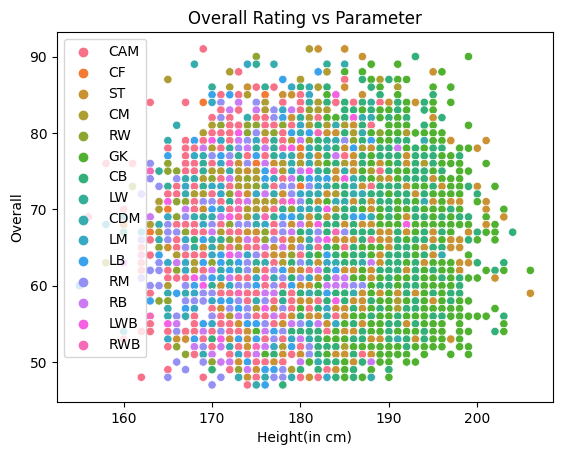

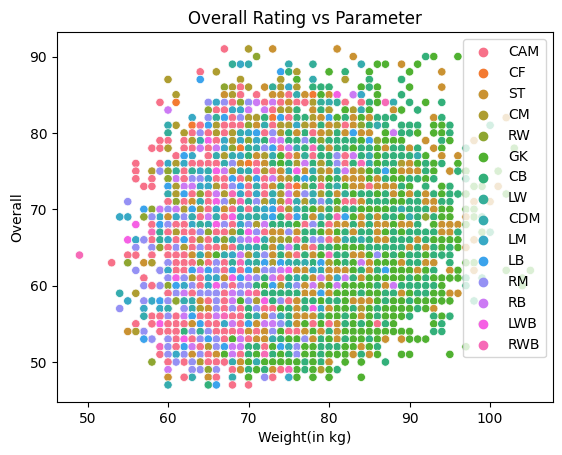

In [8]:
for col in ['Pace Total', 'Shooting Total', 'Passing Total', 'Dribbling Total', 'Physicality Total', 'Height(in cm)', 'Weight(in kg)']:
    plt.figure()
    plt.title("Overall Rating vs Parameter")
    sns.scatterplot(x = col, y= 'Overall', hue='Best Position', data=df)
    plt.xlabel(col)
    plt.ylabel("Overall")
    plt.legend();

Regression

In [9]:
x = df.drop(['Overall'], axis=1)
y = df['Overall']
x.reset_index(drop=True, inplace=True)
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, train_size=0.8, random_state=10)

In [10]:
x_train.head()

Value(in Euro) Best Position  Age  Height(in cm)  Weight(in kg)  \
12182          950000            CB   18            187             76   
15942          400000           LWB   18            183             78   
7222           900000            LB   29            174             73   
16133          375000            CB   18            194             90   
7187          1400000            CB   23            200             85   

       TotalStats  BaseStats  Wage(in Euro)  Weak Foot Rating  Skill Moves  \
12182        1434        310           1000                 2            2   
15942        1427        316            500                 4            2   
7222         1636        349           2000                 3            2   
16133        1247        282            900                 3            2   
7187         1583        339           2000                 3            2   

       ...  LM Rating CM Rating RM Rating  LWB Rating  CDM Rating  RWB Rating  \
12182  ...         49        52        49          58          61          58   
15942  ...         56        51        56          57          53          57   
7222   ...         59        56        59          67          64          67   
16133  ...         39        35        39          50          47          50   
7187   ...         56        62        56          63          68          63   

       LB Rating  CB Rating  RB Rating  GK Rating  
12182         60         65         60         17  
15942         57         53         57         15  
7222          67         67         67         19  
16133         52         58         52         15  
7187          63         69         63         19  

[5 rows x 70 columns]

In [11]:
oe = preprocessing.OrdinalEncoder(categories=[['Low', 'Medium', 'High']])

In [12]:
x_train['Attacking Work Rate'] = oe.fit_transform(x_train[['Attacking Work Rate']])
x_train['Defensive Work Rate'] = oe.fit_transform(x_train[['Defensive Work Rate']])
x_test['Attacking Work Rate'] = oe.fit_transform(x_test[['Attacking Work Rate']])
x_test['Defensive Work Rate'] = oe.fit_transform(x_test[['Defensive Work Rate']])

In [13]:
ohe = preprocessing.OneHotEncoder()
train_positions = ohe.fit_transform(x_train[["Best Position"]]).toarray()
print(ohe.categories_)
test_positions = ohe.fit_transform(x_test[["Best Position"]]).toarray()
print(ohe.categories_)

[array(['CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LB', 'LM', 'LW', 'LWB',
       'RB', 'RM', 'RW', 'RWB', 'ST'], dtype=object)]
[array(['CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LB', 'LM', 'LW', 'LWB',
       'RB', 'RM', 'RW', 'RWB', 'ST'], dtype=object)]


In [14]:
feature_labels = np.concatenate([row for row in ohe.categories_])

In [15]:
train_positions = pd.DataFrame(train_positions, columns=feature_labels)
test_positions = pd.DataFrame(test_positions, columns=feature_labels)

In [16]:
x_train.drop(['Best Position'], axis=1, inplace=True)
x_test.drop(['Best Position'], axis=1, inplace=True)

In [17]:
x_train

Value(in Euro)  Age  Height(in cm)  Weight(in kg)  TotalStats  \
12182          950000   18            187             76        1434   
15942          400000   18            183             78        1427   
7222           900000   29            174             73        1636   
16133          375000   18            194             90        1247   
7187          1400000   23            200             85        1583   
...               ...  ...            ...            ...         ...   
4829           275000   36            190             80        1430   
10201          725000   28            177             71        1711   
9372           500000   31            186             87        1650   
7291          2300000   21            173             65        1757   
7293          1200000   26            180             73        1595   

       BaseStats  Wage(in Euro)  Weak Foot Rating  Skill Moves  \
12182        310           1000                 2            2   
15942        316            500                 4            2   
7222         349           2000                 3            2   
16133        282            900                 3            2   
7187         339           2000                 3            2   
...          ...            ...               ...          ...   
4829         292          16000                 2            2   
10201        344           2000                 3            3   
9372         356            750                 3            2   
7291         380           6000                 4            2   
7293         340           7000                 4            3   

       International Reputation  ...  LM Rating  CM Rating  RM Rating  \
12182                         1  ...         49         52         49   
15942                         1  ...         56         51         56   
7222                          1  ...         59         56         59   
16133                         1  ...         39         35         39   
7187                          1  ...         56         62         56   
...                         ...  ...        ...        ...        ...   
4829                          3  ...         42         49         42   
10201                         1  ...         65         63         65   
9372                          1  ...         58         61         58   
7291                          1  ...         68         69         68   
7293                          1  ...         68         61         68   

       LWB Rating  CDM Rating  RWB Rating  LB Rating  CB Rating  RB Rating  \
12182          58          61          58         60         65         60   
15942          57          53          57         57         53         57   
7222           67          64          67         67         67         67   
16133          50          47          50         52         58         52   
7187           63          68          63         63         69         63   
...           ...         ...         ...        ...        ...        ...   
4829           56          63          56         59         70         59   
10201          53          52          53         51         46         51   
9372           63          65          63         63         65         63   
7291           68          68          68         67         64         67   
7293           48          45          48         44         37         44   

       GK Rating  
12182         17  
15942         15  
7222          19  
16133         15  
7187          19  
...          ...  
4829          19  
10201         19  
9372          18  
7291          16  
7293          16  

[14023 rows x 69 columns]

In [18]:
train_positions

CAM   CB  CDM   CF   CM   GK   LB   LM   LW  LWB   RB   RM   RW  RWB  \
0      0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
2      0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3      0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4      0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
14018  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
14019  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
14020  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
14021  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
14022  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   

        ST  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0  
...    ...  
14018  0.0  
14019  0.0  
14020  0.0  
14021  0.0  
14022  0.0  

[14023 rows x 15 columns]

In [19]:
x_train = pd.concat([x_train, train_positions.set_axis(x_train.index)], axis=1)
x_test = pd.concat([x_test, test_positions.set_axis(x_test.index)], axis=1)

In [20]:
x_train.head()

Value(in Euro)  Age  Height(in cm)  Weight(in kg)  TotalStats  \
12182          950000   18            187             76        1434   
15942          400000   18            183             78        1427   
7222           900000   29            174             73        1636   
16133          375000   18            194             90        1247   
7187          1400000   23            200             85        1583   

       BaseStats  Wage(in Euro)  Weak Foot Rating  Skill Moves  \
12182        310           1000                 2            2   
15942        316            500                 4            2   
7222         349           2000                 3            2   
16133        282            900                 3            2   
7187         339           2000                 3            2   

       International Reputation  ...   GK   LB   LM   LW  LWB   RB   RM   RW  \
12182                         1  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
15942                         1  ...  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
7222                          1  ...  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
16133                         1  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
7187                          1  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

       RWB   ST  
12182  0.0  0.0  
15942  0.0  0.0  
7222   0.0  0.0  
16133  0.0  0.0  
7187   0.0  0.0  

[5 rows x 84 columns]

In [21]:
pca = decomposition.PCA(n_components=None)

In [22]:
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [23]:
pca_variance = np.cumsum(pca.explained_variance_ratio_)
pca_variance

array([0.99999783, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [24]:
for i in range(len(pca_variance)):
    if pca_variance[i] >= 0.95:
        print(i)
        break;

0


In [25]:
new_pca = decomposition.PCA(n_components= 1)

In [26]:
x_train_trf = new_pca.fit_transform(x_train)
x_test_trf = new_pca.transform(x_test)

In [27]:
x_train_trf = pd.DataFrame(x_train_trf)
x_test_trf = pd.DataFrame(x_test_trf)

In [28]:
x_train_trf

0
0     -1.991433e+06
1     -2.541432e+06
2     -2.041430e+06
3     -2.566431e+06
4     -1.541431e+06
...             ...
14018 -2.666399e+06
14019 -2.216430e+06
14020 -2.441432e+06
14021 -6.414249e+05
14022 -1.741420e+06

[14023 rows x 1 columns]

Linear Regression

In [29]:
lr = linear_model.LinearRegression()
reg = lr.fit(x_train, y_train)

In [30]:
reg.score(x_train, y_train)

0.9270237383024331

In [31]:
reg.score(x_test, y_test)

0.9243584463548896

In [32]:
new_reg = lr.fit(x_train_trf, y_train)

In [33]:
print(new_reg.score(x_train_trf, y_train))
print(new_reg.score(x_test_trf, y_test))

0.3210569264813796
0.30129453471156054


In [34]:
train_scores = []
test_scores = []
for val in [2, 3]:
    model = pipeline.Pipeline([('poly', preprocessing.PolynomialFeatures(degree=val, interaction_only=True)),
                  ('linear', linear_model.LinearRegression())])
    fit = model.fit(x_train_trf, y_train)
    train_score = fit.score(x_train_trf, y_train)
    train_scores.append(train_score)
    test_score = fit.score(x_test_trf, y_test)
    test_scores.append(test_score)
print(train_scores)
print(test_scores)

[0.3210569264813796, 0.3210569264813796]
[0.30129453471156054, 0.30129453471156054]


In [35]:
train_scores = []
test_scores = []
for val in [2]:
    model = pipeline.Pipeline([('poly', preprocessing.PolynomialFeatures(degree=val, interaction_only=True)),
                  ('linear', linear_model.LinearRegression())])
    fit = model.fit(x_train, y_train)
    train_score = fit.score(x_train, y_train)
    train_scores.append(train_score)
    test_score = fit.score(x_test, y_test)
    test_scores.append(test_score)
print(train_scores)
print(test_scores)

[0.9957011270438964]
[0.9929469413812083]


In [36]:
rain_scores = []
test_scores = []
for val in [2]:
    model = pipeline.Pipeline([('poly', preprocessing.PolynomialFeatures(degree=val, interaction_only=False)),
                  ('linear', linear_model.LinearRegression())])
    fit = model.fit(x_train, y_train)
    train_score = fit.score(x_train, y_train)
    train_scores.append(train_score)
    test_score = fit.score(x_test, y_test)
    test_scores.append(test_score)
print(train_scores)
print(test_scores)

[0.9957011270438964, 0.9927549717669018]
[0.9903042695472315]


In [37]:
x_train

Value(in Euro)  Age  Height(in cm)  Weight(in kg)  TotalStats  \
12182          950000   18            187             76        1434   
15942          400000   18            183             78        1427   
7222           900000   29            174             73        1636   
16133          375000   18            194             90        1247   
7187          1400000   23            200             85        1583   
...               ...  ...            ...            ...         ...   
4829           275000   36            190             80        1430   
10201          725000   28            177             71        1711   
9372           500000   31            186             87        1650   
7291          2300000   21            173             65        1757   
7293          1200000   26            180             73        1595   

       BaseStats  Wage(in Euro)  Weak Foot Rating  Skill Moves  \
12182        310           1000                 2            2   
15942        316            500                 4            2   
7222         349           2000                 3            2   
16133        282            900                 3            2   
7187         339           2000                 3            2   
...          ...            ...               ...          ...   
4829         292          16000                 2            2   
10201        344           2000                 3            3   
9372         356            750                 3            2   
7291         380           6000                 4            2   
7293         340           7000                 4            3   

       International Reputation  ...   GK   LB   LM   LW  LWB   RB   RM   RW  \
12182                         1  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
15942                         1  ...  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
7222                          1  ...  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
16133                         1  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
7187                          1  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...                         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
4829                          3  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
10201                         1  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
9372                          1  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
7291                          1  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
7293                          1  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   

       RWB   ST  
12182  0.0  0.0  
15942  0.0  0.0  
7222   0.0  0.0  
16133  0.0  0.0  
7187   0.0  0.0  
...    ...  ...  
4829   0.0  0.0  
10201  0.0  0.0  
9372   0.0  0.0  
7291   0.0  0.0  
7293   0.0  0.0  

[14023 rows x 84 columns]

ANN

In [112]:
model = Sequential([
    layers.Dense(84, activation='relu', input_dim = 84),
    layers.Dense(42, activation='relu'),
    layers.Dense(21, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(2, activation='linear'),
    layers.Dense(1, activation='linear')
])

In [113]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 84)                7140      
                                                                 
 dense_22 (Dense)            (None, 42)                3570      
                                                                 
 dense_23 (Dense)            (None, 21)                903       
                                                                 
 dense_24 (Dense)            (None, 4)                 88        
                                                                 
 dense_25 (Dense)            (None, 2)                 10        
                                                                 
 dense_26 (Dense)            (None, 1)                 3         
                                                                 
Total params: 11,714
Trainable params: 11,714
Non-trai

In [116]:
model.compile(loss=keras.losses.Huber(delta=1.0), optimizer=keras.optimizers.Adam(learning_rate = 0.0001))

In [117]:
history = model.fit(x_train, y_train, epochs = 100, validation_split=0.2)

Epoch 1/100
351/351 [==============================] - 3s 4ms/step - loss: 3.7819 - val_loss: 2.5118
Epoch 2/100
351/351 [==============================] - 1s 4ms/step - loss: 3.4110 - val_loss: 2.6826
Epoch 3/100
351/351 [==============================] - 1s 4ms/step - loss: 3.4760 - val_loss: 2.6101
Epoch 4/100
351/351 [==============================] - 1s 3ms/step - loss: 3.0527 - val_loss: 2.8228
Epoch 5/100
351/351 [==============================] - 2s 4ms/step - loss: 3.0345 - val_loss: 2.3080
Epoch 6/100
351/351 [==============================] - 2s 5ms/step - loss: 3.3409 - val_loss: 2.3923
Epoch 7/100
351/351 [==============================] - 1s 3ms/step - loss: 3.0884 - val_loss: 2.6742
Epoch 8/100
351/351 [==============================] - 1s 3ms/step - loss: 3.1053 - val_loss: 2.4674
Epoch 9/100
351/351 [==============================] - 1s 3ms/step - loss: 2.9836 - val_loss: 2.2164
Epoch 10/100
351/351 [==============================] - 1s 3ms/step - loss: 3.1102 - val_lo

In [42]:
from sklearn.metrics import r2_score

In [118]:
y_pred = model.predict(x_test)

110/110 [==============================] - 0s 2ms/step


In [119]:
y_pred

array([[62.331455],
       [60.24707 ],
       [59.91468 ],
       ...,
       [57.428436],
       [65.46642 ],
       [70.08525 ]], dtype=float32)

In [120]:
y_test

5689     69
12198    63
13792    61
8551     66
13832    61
         ..
17189    52
1572     75
10824    64
6502     68
3559     71
Name: Overall, Length: 3506, dtype: int64

In [121]:
r2_score(y_test, y_pred)

0.7416457519106081

Regression Tree

In [47]:
model = tree.DecisionTreeRegressor(max_depth = 8)

In [48]:
reg = model.fit(x_train, y_train)

In [49]:
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))

0.9778254829500166
0.9694265018336559


Classification

In [50]:
class_x = df.drop(['Best Position', 'Wage(in Euro)', 'Value(in Euro)', 'Overall', 'Weak Foot Rating', 'International Reputation', 'Age',
                   'Height(in cm)', 'Weight(in kg)', 'TotalStats', 'BaseStats', 'Skill Moves'], axis=1)
class_y = df['Best Position']
x.reset_index(drop=True, inplace=True)
cls_x_train, cls_x_test, cls_y_train, cls_y_test = model_selection.train_test_split(class_x, class_y, train_size=0.8, random_state=10)

In [51]:
cls_x_train['Attacking Work Rate'] = oe.fit_transform(cls_x_train[['Attacking Work Rate']])
cls_x_train['Defensive Work Rate'] = oe.fit_transform(cls_x_train[['Defensive Work Rate']])
cls_x_test['Attacking Work Rate'] = oe.fit_transform(cls_x_test[['Attacking Work Rate']])
cls_x_test['Defensive Work Rate'] = oe.fit_transform(cls_x_test[['Defensive Work Rate']])

<ipython-input-52-3a24eb1490ae>:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x = cls_x_train['Attacking Work Rate'], hue=cls_y_train)
<ipython-input-52-3a24eb1490ae>:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x = cls_x_train['Defensive Work Rate'], hue=cls_y_train)


<Figure size 640x480 with 0 Axes>

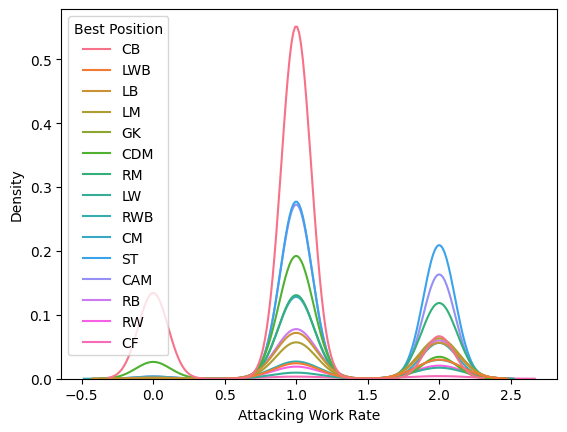

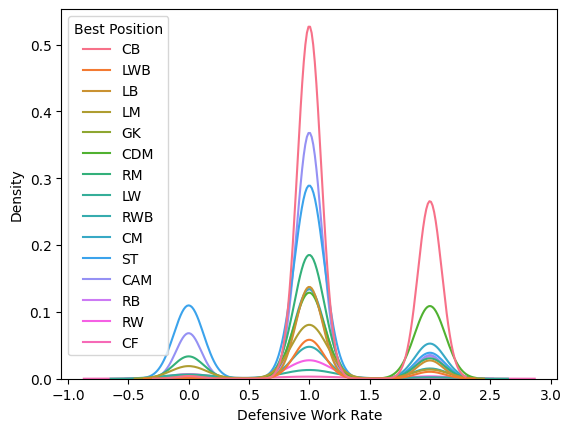

<Figure size 640x480 with 0 Axes>

In [52]:
sns.kdeplot(x = cls_x_train['Attacking Work Rate'], hue=cls_y_train)
plt.figure()
plt.legend();
sns.kdeplot(x = cls_x_train['Defensive Work Rate'], hue=cls_y_train)
plt.figure()

In [53]:
cls_x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14023 entries, 12182 to 7293
Data columns (total 59 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Attacking Work Rate     14023 non-null  float64
 1   Defensive Work Rate     14023 non-null  float64
 2   Pace Total              14023 non-null  int64  
 3   Shooting Total          14023 non-null  int64  
 4   Passing Total           14023 non-null  int64  
 5   Dribbling Total         14023 non-null  int64  
 6   Defending Total         14023 non-null  int64  
 7   Physicality Total       14023 non-null  int64  
 8   Crossing                14023 non-null  int64  
 9   Finishing               14023 non-null  int64  
 10  Heading Accuracy        14023 non-null  int64  
 11  Short Passing           14023 non-null  int64  
 12  Volleys                 14023 non-null  int64  
 13  Dribbling               14023 non-null  int64  
 14  Curve                   14023 non-n

In [54]:
pca = decomposition.PCA(n_components=1)
trf_cls_train = pca.fit_transform(cls_x_train)
trf_cls_test = pca.transform(cls_x_test)

In [55]:
cls_y_train.value_counts()

CB     2761
ST     1903
CAM    1731
GK     1590
RM     1095
CDM    1076
CM      841
RB      702
LB      652
LM      594
RWB     322
LWB     302
RW      233
LW      163
CF       58
Name: Best Position, dtype: int64

In [56]:
le = preprocessing.LabelEncoder()
cls_y_train = le.fit_transform(cls_y_train)
cls_y_test = le.fit_transform(cls_y_test)

In [57]:
cls_y_train = pd.DataFrame(cls_y_train)
cls_y_test = pd.DataFrame(cls_y_test)

In [58]:
cls_y_train

0
0      1
1      9
2      6
3      1
4      1
...   ..
14018  1
14019  0
14020  2
14021  4
14022  7

[14023 rows x 1 columns]

In [59]:
cls_y_train.value_counts()

1     2761
14    1903
0     1731
5     1590
11    1095
2     1076
4      841
10     702
6      652
7      594
13     322
9      302
12     233
8      163
3       58
dtype: int64

<ipython-input-60-ae2d7cc580ad>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 640x480 with 0 Axes>

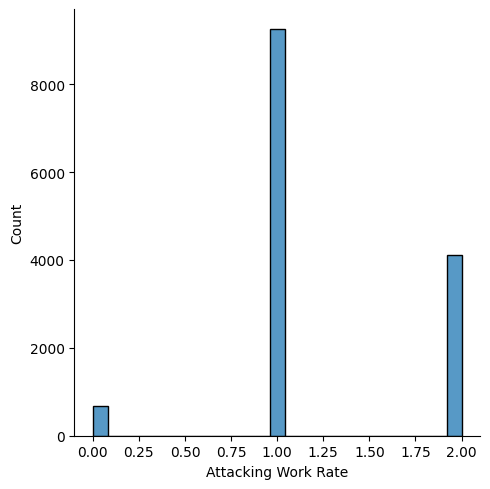

<Figure size 640x480 with 0 Axes>

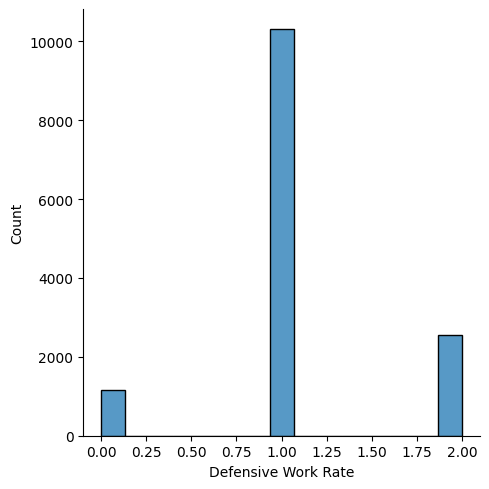

<Figure size 640x480 with 0 Axes>

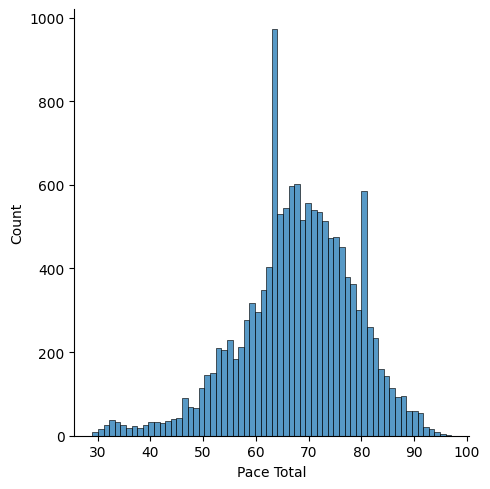

<Figure size 640x480 with 0 Axes>

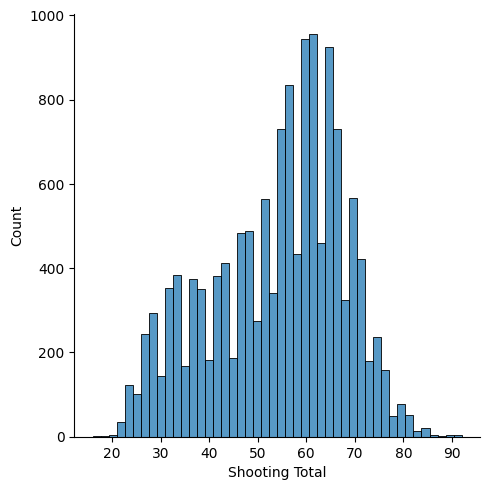

<Figure size 640x480 with 0 Axes>

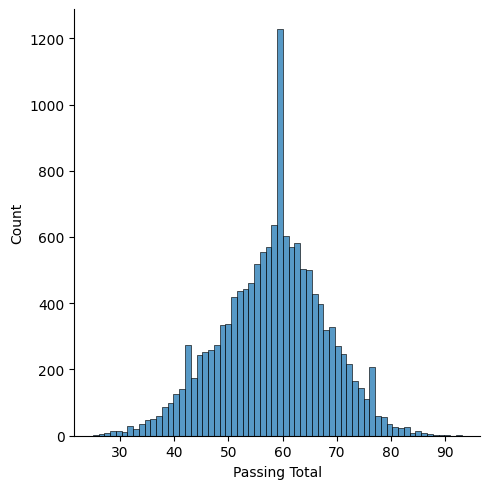

<Figure size 640x480 with 0 Axes>

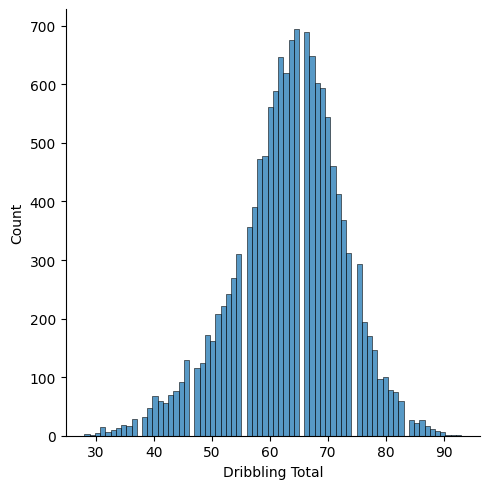

<Figure size 640x480 with 0 Axes>

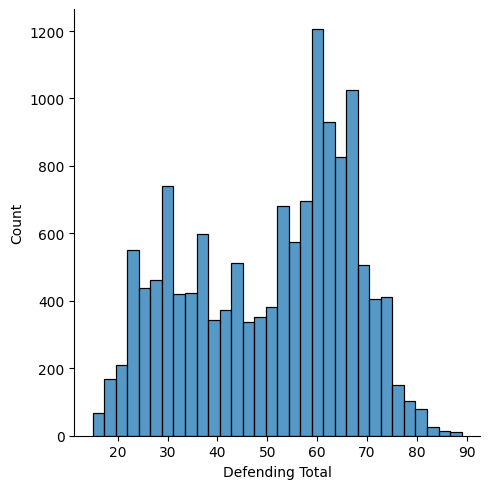

<Figure size 640x480 with 0 Axes>

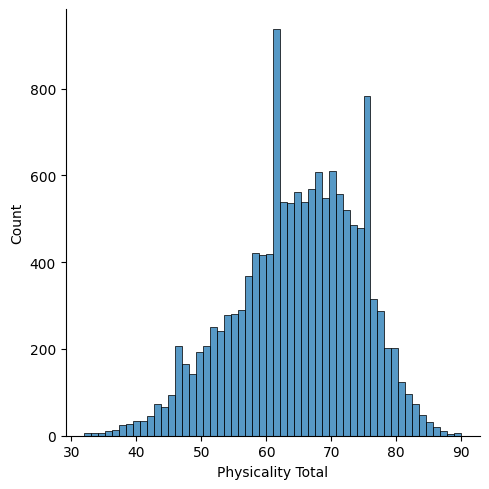

<Figure size 640x480 with 0 Axes>

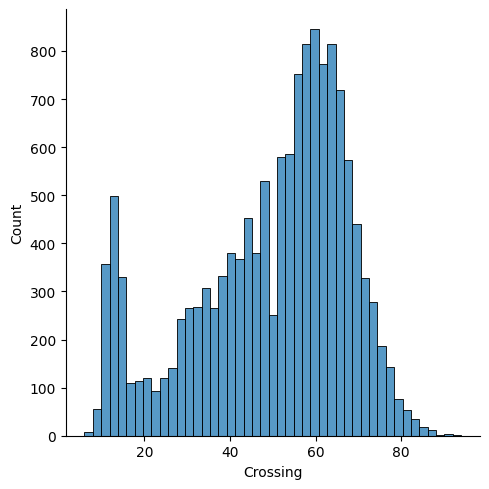

<Figure size 640x480 with 0 Axes>

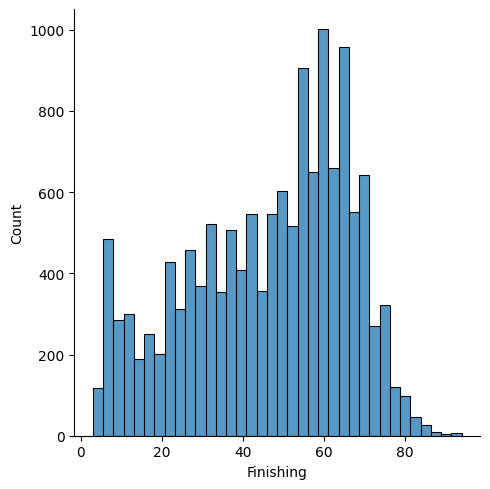

<Figure size 640x480 with 0 Axes>

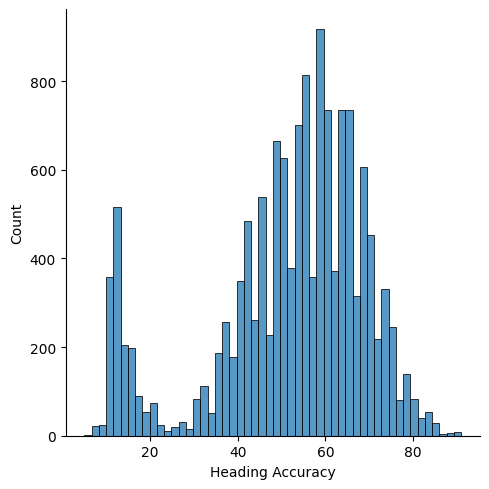

<Figure size 640x480 with 0 Axes>

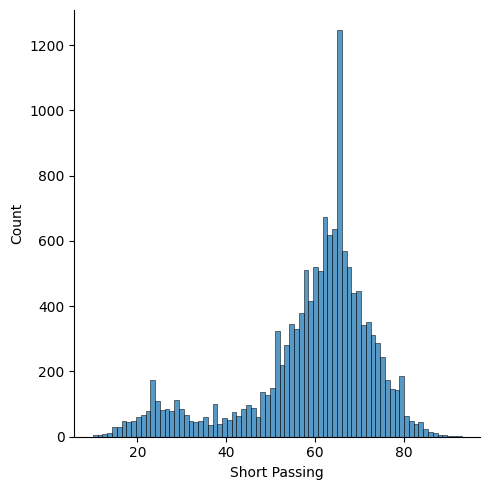

<Figure size 640x480 with 0 Axes>

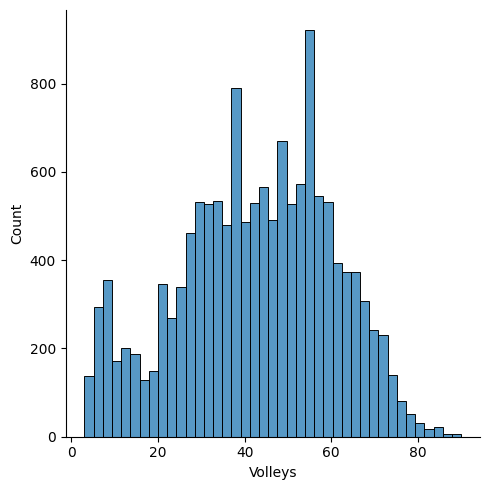

<Figure size 640x480 with 0 Axes>

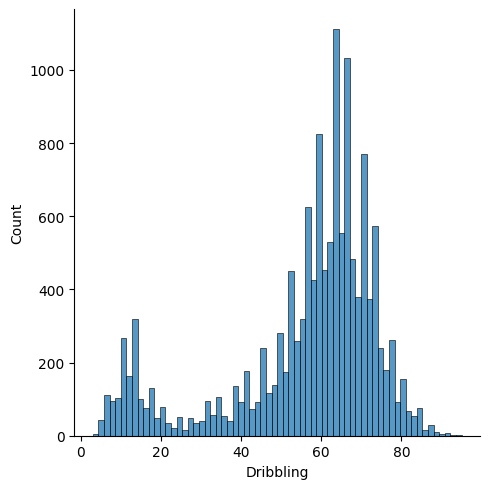

<Figure size 640x480 with 0 Axes>

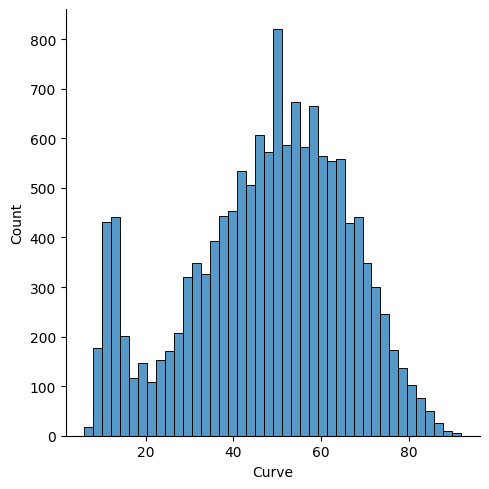

<Figure size 640x480 with 0 Axes>

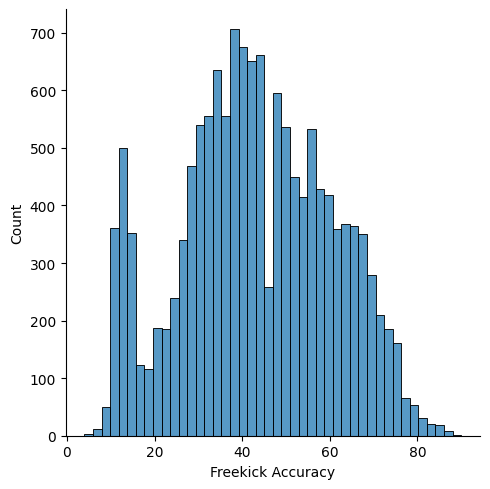

<Figure size 640x480 with 0 Axes>

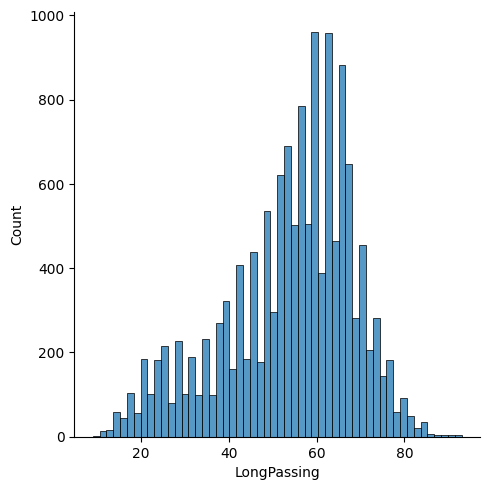

<Figure size 640x480 with 0 Axes>

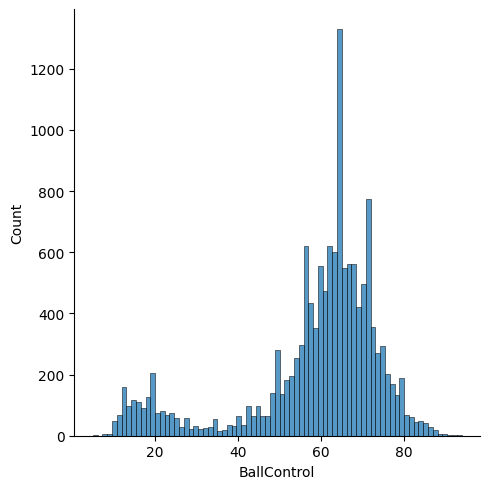

<Figure size 640x480 with 0 Axes>

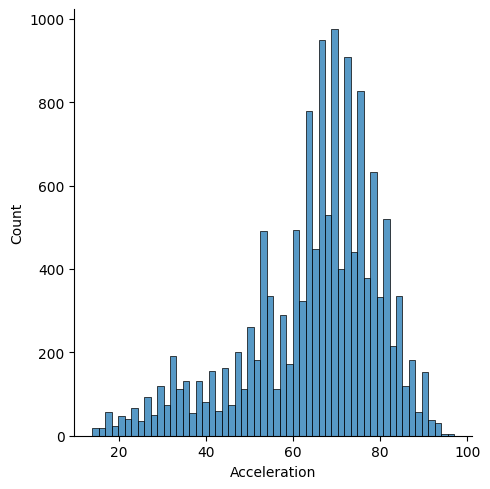

<Figure size 640x480 with 0 Axes>

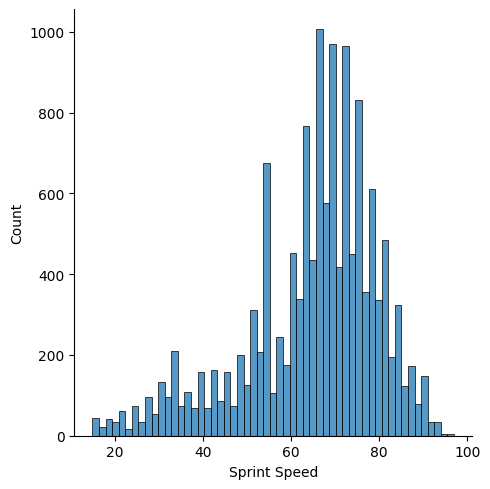

<Figure size 640x480 with 0 Axes>

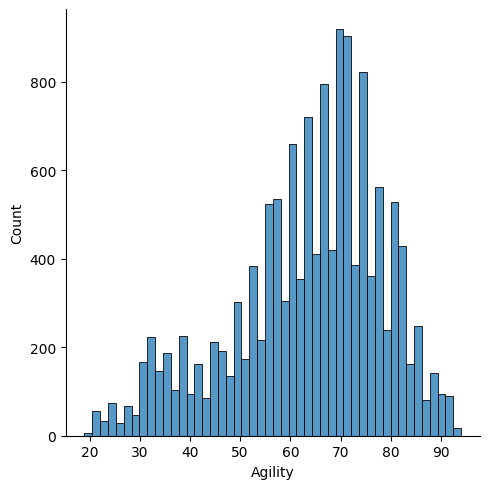

<Figure size 640x480 with 0 Axes>

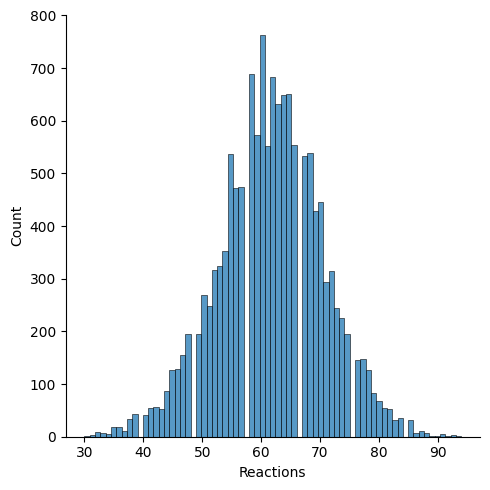

<Figure size 640x480 with 0 Axes>

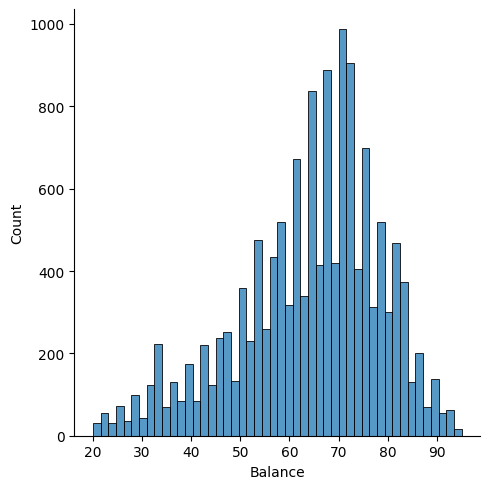

<Figure size 640x480 with 0 Axes>

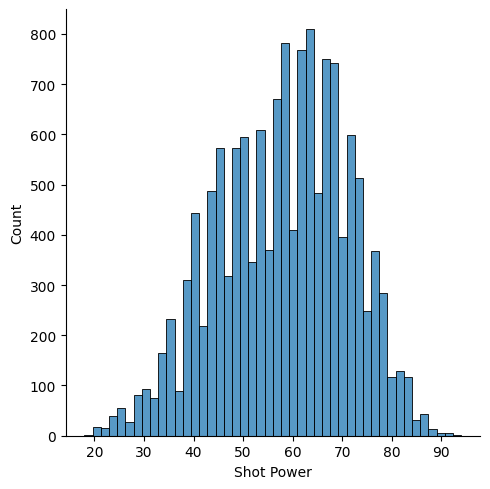

<Figure size 640x480 with 0 Axes>

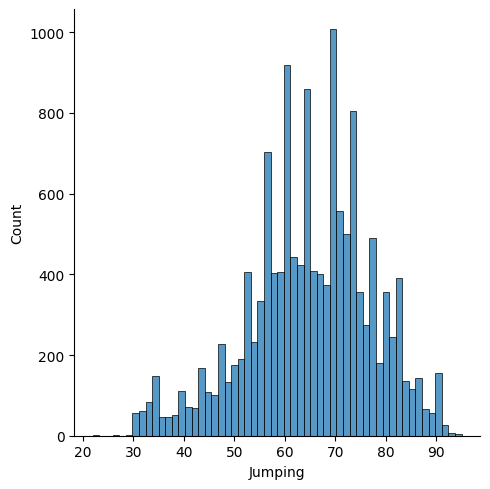

<Figure size 640x480 with 0 Axes>

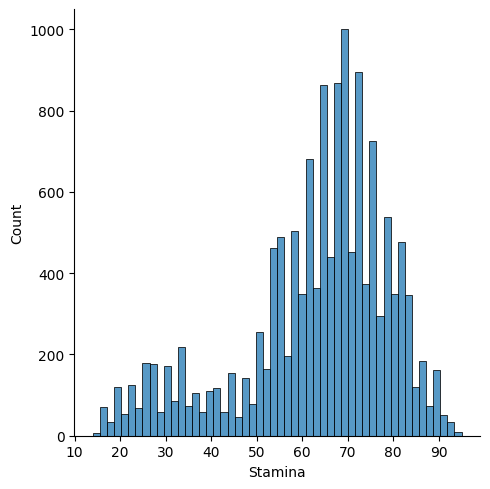

<Figure size 640x480 with 0 Axes>

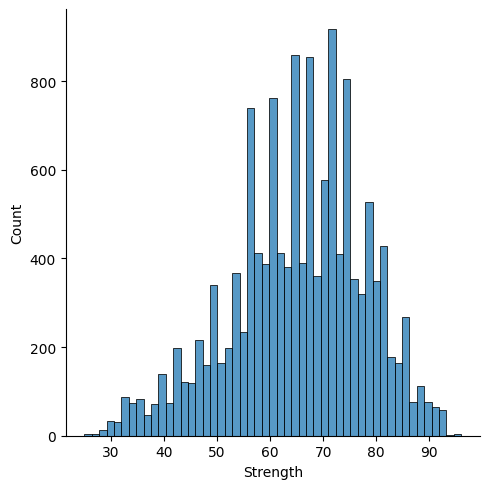

<Figure size 640x480 with 0 Axes>

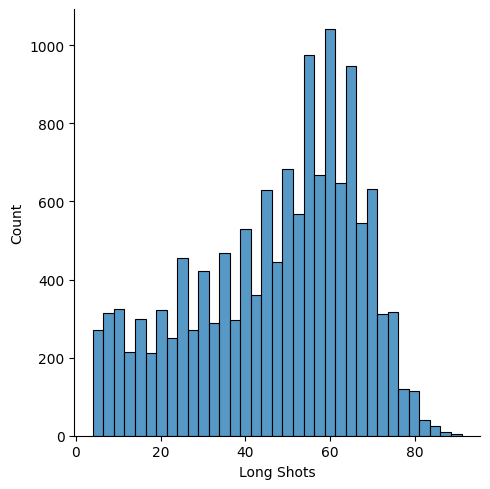

<Figure size 640x480 with 0 Axes>

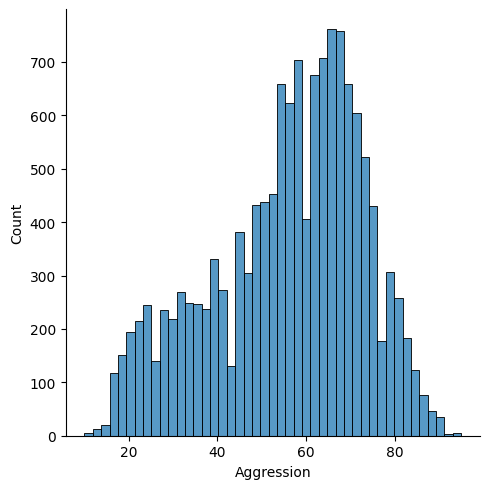

<Figure size 640x480 with 0 Axes>

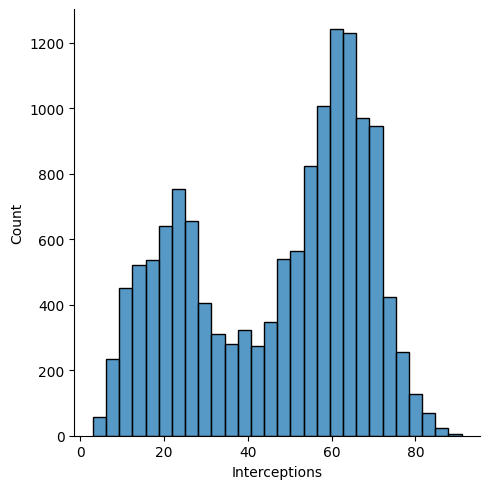

<Figure size 640x480 with 0 Axes>

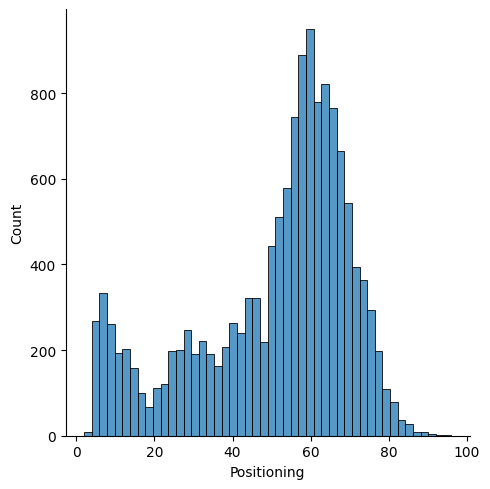

<Figure size 640x480 with 0 Axes>

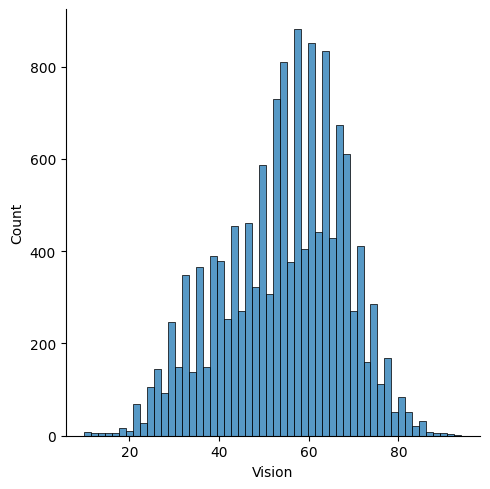

<Figure size 640x480 with 0 Axes>

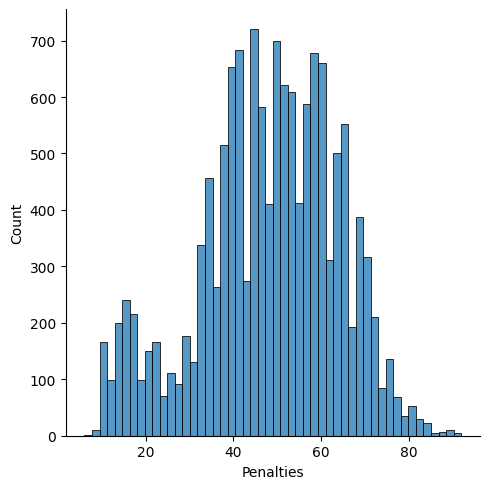

<Figure size 640x480 with 0 Axes>

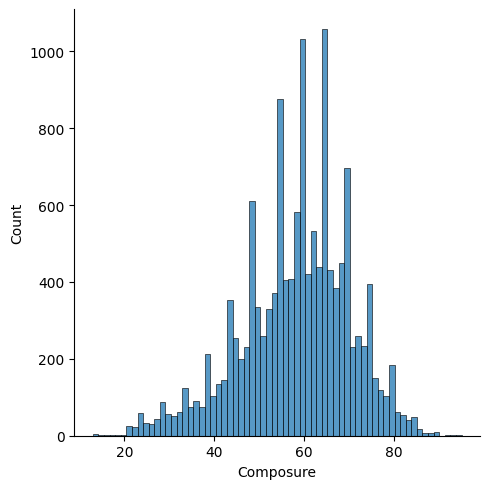

<Figure size 640x480 with 0 Axes>

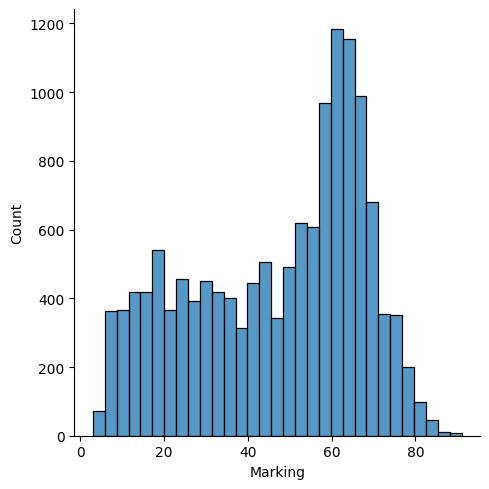

<Figure size 640x480 with 0 Axes>

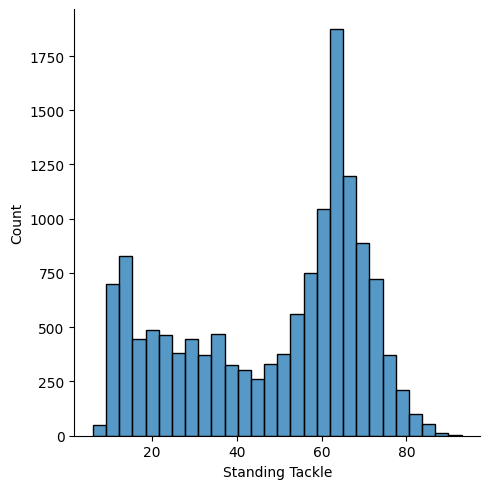

<Figure size 640x480 with 0 Axes>

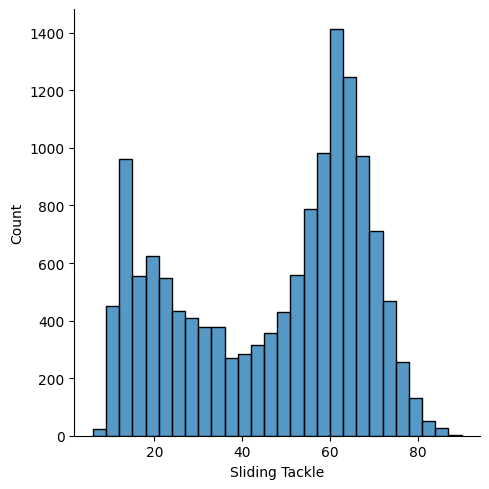

<Figure size 640x480 with 0 Axes>

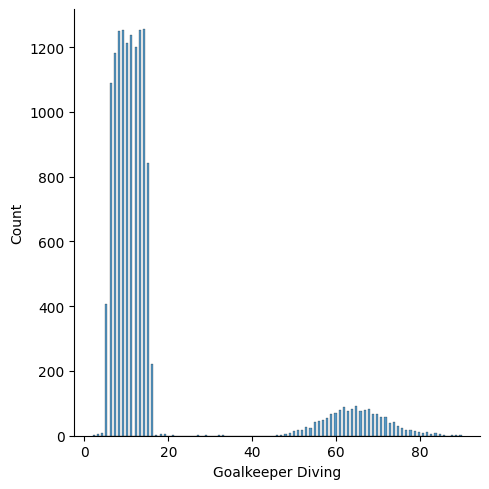

<Figure size 640x480 with 0 Axes>

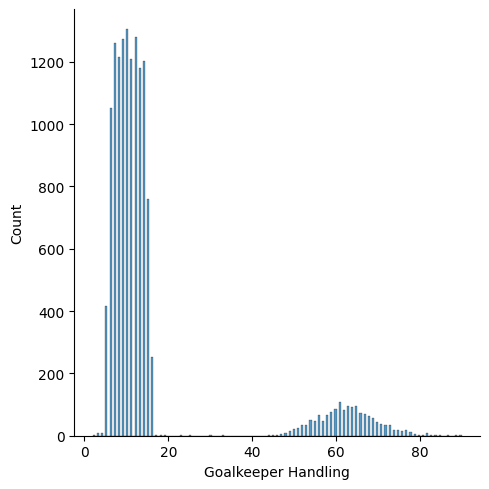

<Figure size 640x480 with 0 Axes>

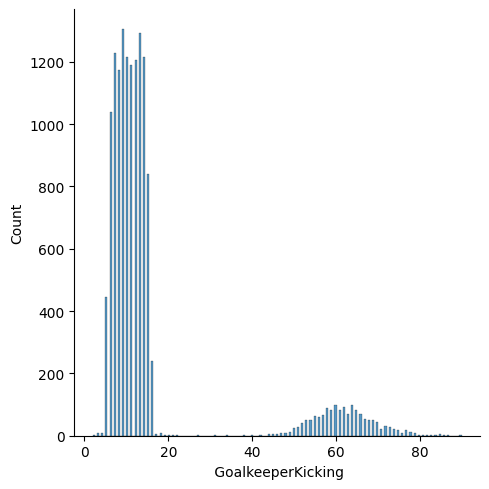

<Figure size 640x480 with 0 Axes>

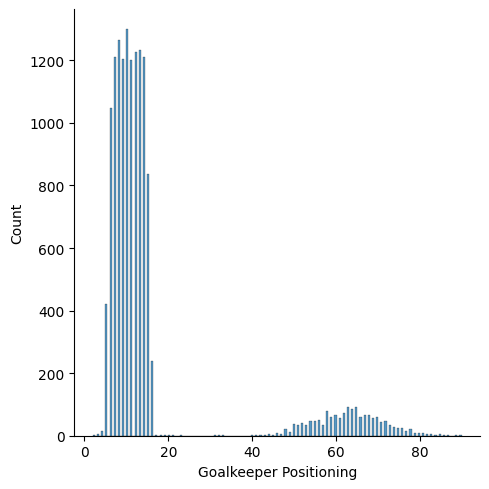

<Figure size 640x480 with 0 Axes>

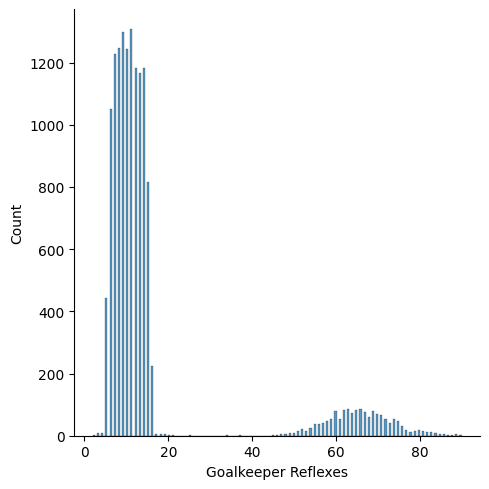

<Figure size 640x480 with 0 Axes>

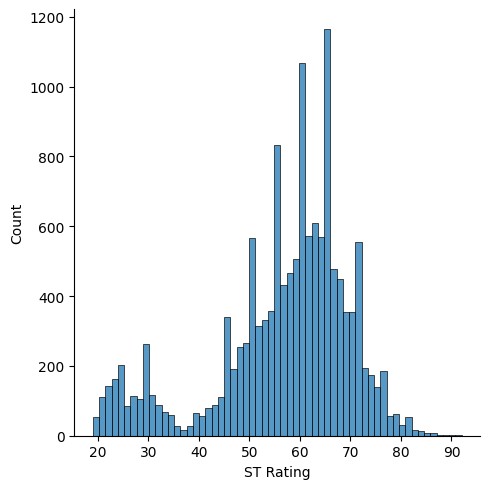

<Figure size 640x480 with 0 Axes>

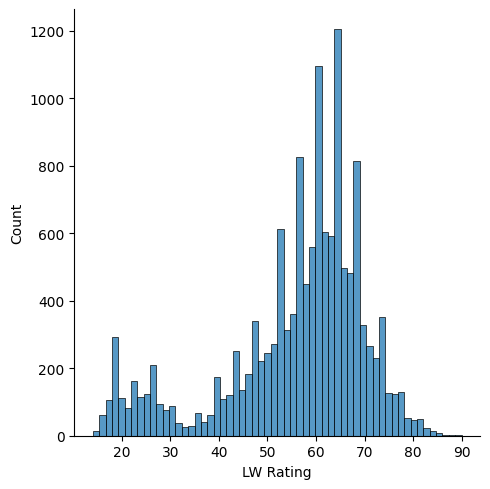

<Figure size 640x480 with 0 Axes>

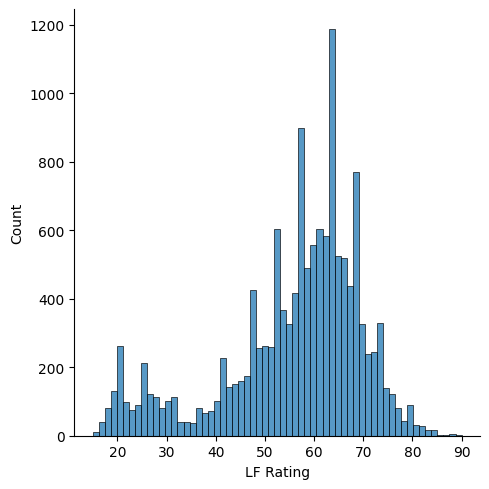

<Figure size 640x480 with 0 Axes>

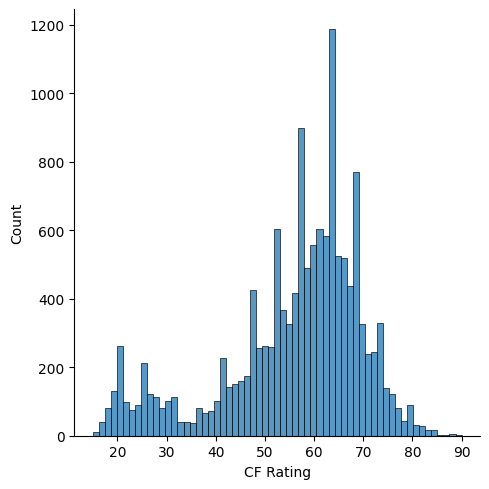

<Figure size 640x480 with 0 Axes>

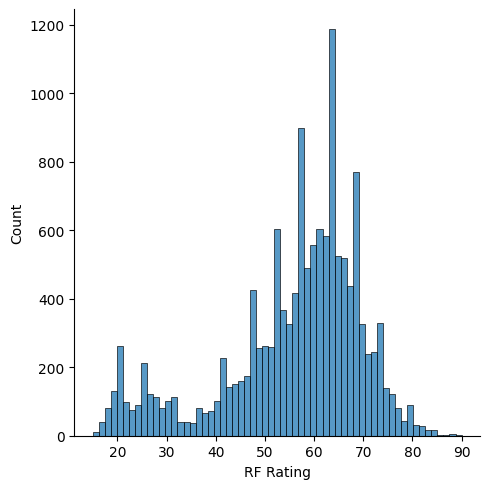

<Figure size 640x480 with 0 Axes>

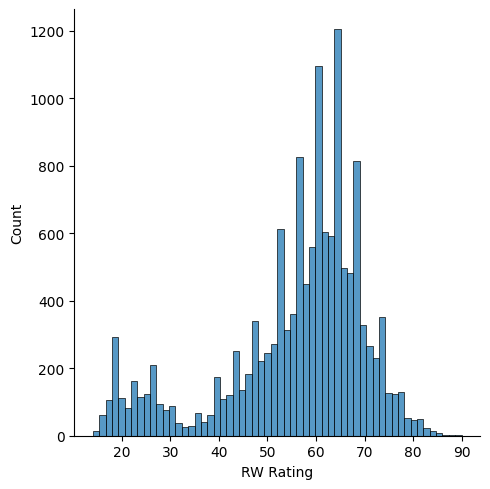

<Figure size 640x480 with 0 Axes>

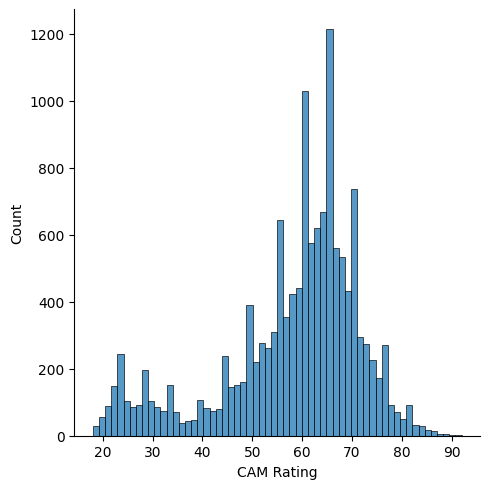

<Figure size 640x480 with 0 Axes>

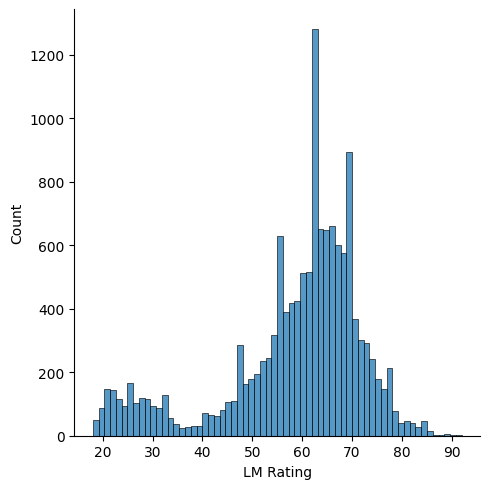

<Figure size 640x480 with 0 Axes>

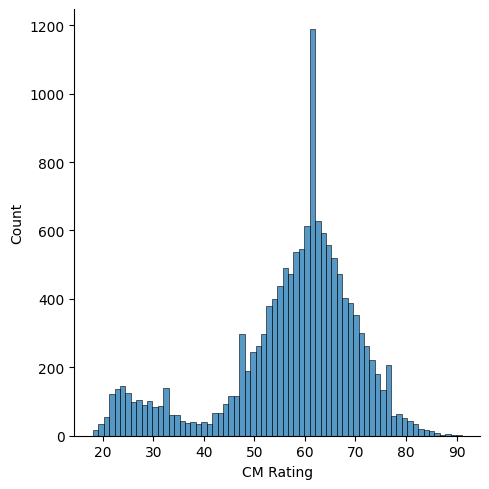

<Figure size 640x480 with 0 Axes>

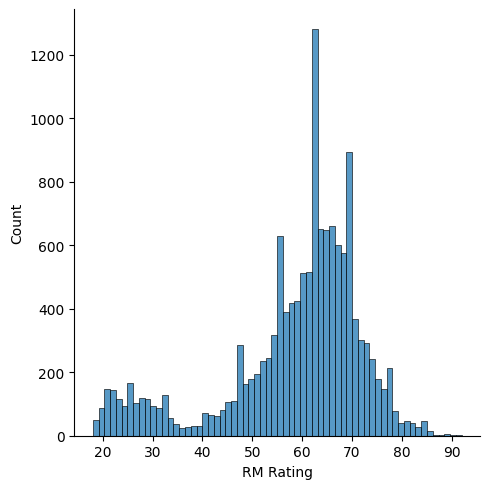

<Figure size 640x480 with 0 Axes>

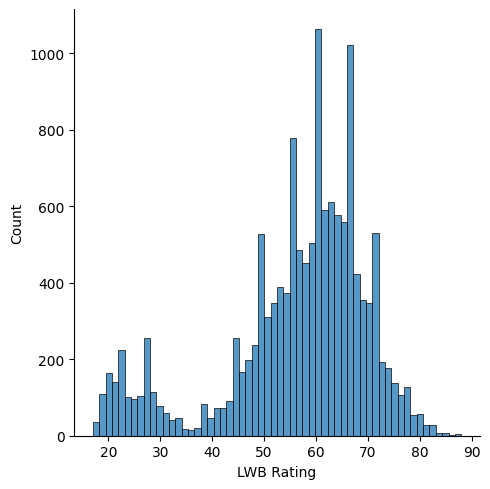

<Figure size 640x480 with 0 Axes>

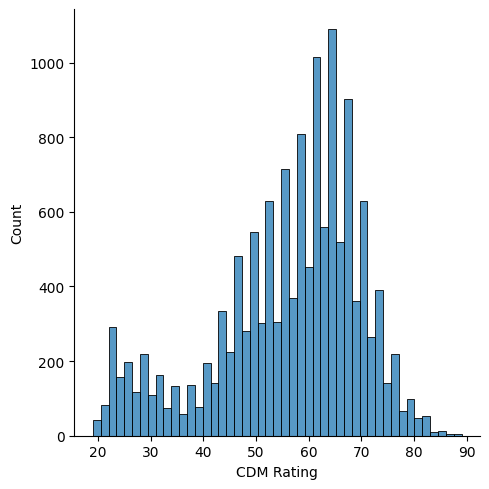

<Figure size 640x480 with 0 Axes>

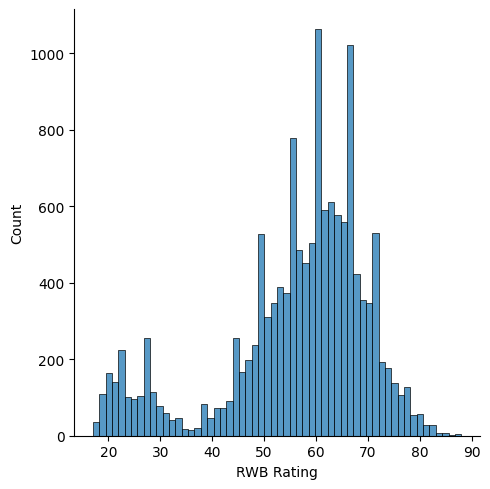

<Figure size 640x480 with 0 Axes>

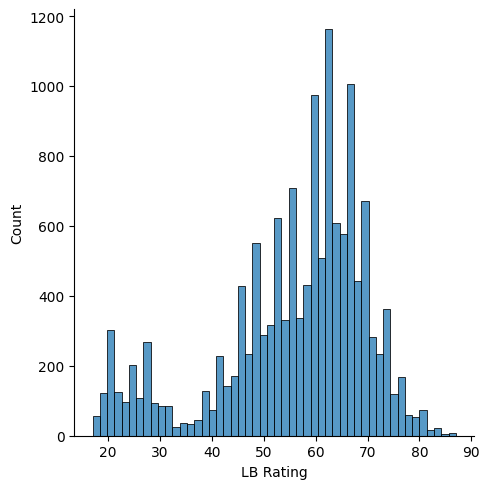

<Figure size 640x480 with 0 Axes>

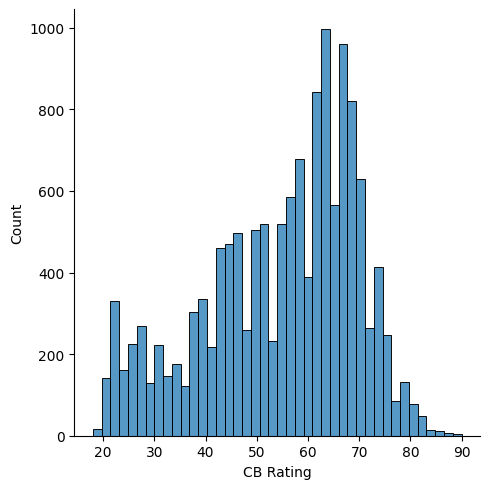

<Figure size 640x480 with 0 Axes>

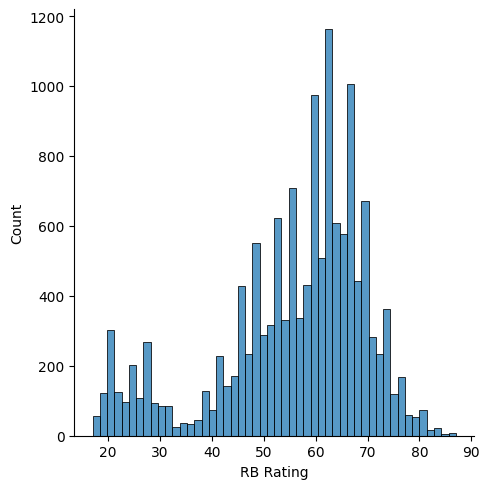

<Figure size 640x480 with 0 Axes>

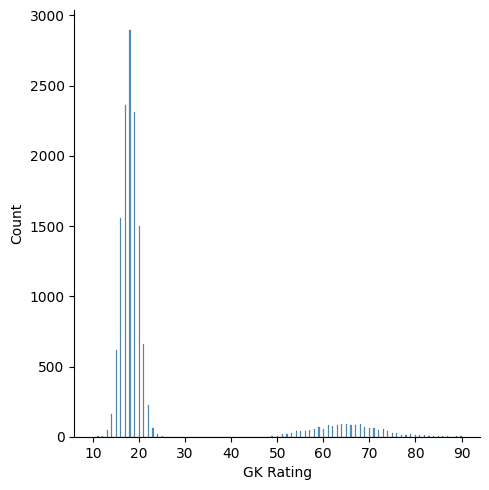

In [60]:
for col in cls_x_train.columns:
  plt.figure()
  sns.displot(data=cls_x_train, x = col)

In [61]:
cls_x_train[['Attacking Work Rate', 'Defensive Work Rate']].shape

(14023, 2)

In [62]:
cls_x_train

Attacking Work Rate  Defensive Work Rate  Pace Total  Shooting Total  \
12182                  1.0                  1.0          53              33   
15942                  2.0                  1.0          79              29   
7222                   2.0                  1.0          62              35   
16133                  1.0                  1.0          64              27   
7187                   1.0                  2.0          41              45   
...                    ...                  ...         ...             ...   
4829                   0.0                  2.0          30              34   
10201                  1.0                  1.0          63              66   
9372                   0.0                  1.0          52              46   
7291                   1.0                  1.0          70              56   
7293                   1.0                  1.0          67              64   

       Passing Total  Dribbling Total  Defending Total  Physicality Total  \
12182             46               51               64                 63   
15942             46               57               50                 55   
7222              51               62               66                 73   
16133             30               33               54                 74   
7187              55               57               66                 75   
...              ...              ...              ...                ...   
4829              39               47               74                 68   
10201             66               71               39                 39   
9372              59               55               61                 83   
7291              64               70               62                 58   
7293              63               70               21                 55   

       Crossing  Finishing  ...  LM Rating  CM Rating  RM Rating  LWB Rating  \
12182        37         30  ...         49         52         49          58   
15942        50         28  ...         56         51         56          57   
7222         59         36  ...         59         56         59          67   
16133        40         23  ...         39         35         39          50   
7187         43         41  ...         56         62         56          63   
...         ...        ...  ...        ...        ...        ...         ...   
4829         30         16  ...         42         49         42          56   
10201        66         63  ...         65         63         65          53   
9372         62         40  ...         58         61         58          63   
7291         58         57  ...         68         69         68          68   
7293         64         68  ...         68         61         68          48   

       CDM Rating  RWB Rating  LB Rating  CB Rating  RB Rating  GK Rating  
12182          61          58         60         65         60         17  
15942          53          57         57         53         57         15  
7222           64          67         67         67         67         19  
16133          47          50         52         58         52         15  
7187           68          63         63         69         63         19  
...           ...         ...        ...        ...        ...        ...  
4829           63          56         59         70         59         19  
10201          52          53         51         46         51         19  
9372           65          63         63         65         63         18  
7291           68          68         67         64         67         16  
7293           45          48         44         37         44         16  

[14023 rows x 59 columns]

In [63]:
scaler = preprocessing.MinMaxScaler()

In [64]:
scalable_train = cls_x_train.drop(['Attacking Work Rate', 'Defensive Work Rate'], axis=1)
scalable_test = cls_x_test.drop(['Attacking Work Rate', 'Defensive Work Rate'], axis=1)
cols = scalable_train.columns

In [65]:
scalable_train = scaler.fit_transform(scalable_train)

In [66]:
scalable_test = scaler.transform(scalable_test)

In [67]:
transformer = preprocessing.PowerTransformer()

In [68]:
scalable_train = transformer.fit_transform(scalable_train)
scalable_test = transformer.transform(scalable_test)

In [69]:
scalable_train = pd.DataFrame(scalable_train, columns = cols)
scalable_test = pd.DataFrame(scalable_test, columns = cols)

In [70]:
cls_x_train = pd.concat([cls_x_train[['Attacking Work Rate', 'Defensive Work Rate']], scalable_train.set_axis(cls_x_train.index)], axis=1)
cls_x_test = pd.concat([cls_x_test[['Attacking Work Rate', 'Defensive Work Rate']], scalable_test.set_axis(cls_x_test.index)], axis=1)

In [71]:
cls_x_train[['Attacking Work Rate', 'Defensive Work Rate']].shape

(14023, 2)

In [72]:
cls_x_train

Attacking Work Rate  Defensive Work Rate  Pace Total  Shooting Total  \
12182                  1.0                  1.0   -1.361947       -1.463937   
15942                  2.0                  1.0    1.060865       -1.682591   
7222                   2.0                  1.0   -0.626159       -1.349395   
16133                  1.0                  1.0   -0.448235       -1.786768   
7187                   1.0                  2.0   -2.184839       -0.723227   
...                    ...                  ...         ...             ...   
4829                   0.0                  2.0   -2.790529       -1.407104   
10201                  1.0                  1.0   -0.537864        0.895491   
9372                   0.0                  1.0   -1.437292       -0.655617   
7291                   1.0                  1.0    0.117929        0.071908   
7293                   1.0                  1.0   -0.171279        0.722917   

       Passing Total  Dribbling Total  Defending Total  Physicality Total  \
12182      -1.247273        -1.293730         0.823907          -0.268495   
15942      -1.247273        -0.717980        -0.091868          -1.051276   
7222       -0.758356        -0.197874         0.962741           0.854098   
16133      -2.706373        -2.717127         0.159732           0.975387   
7187       -0.356378        -0.717980         0.962741           1.098343   
...              ...              ...              ...                ...   
4829       -1.905803        -1.648841         1.537959           0.272435   
10201       0.797320         0.833088        -0.741972          -2.324256   
9372        0.055052        -0.915706         0.619397           2.142709   
7291        0.582387         0.712423         0.687067          -0.769496   
7293        0.475773         0.712423        -1.671929          -1.051276   

       Crossing  Finishing  ...  LM Rating  CM Rating  RM Rating  LWB Rating  \
12182 -0.821464  -0.884271  ...  -0.893811  -0.607827  -0.893811   -0.061476   
15942 -0.122173  -0.972060  ...  -0.412328  -0.679734  -0.412328   -0.145203   
7222   0.453630  -0.609177  ...  -0.172646  -0.299774  -0.172646    0.799557   
16133 -0.673259  -1.183071  ...  -1.418214  -1.586095  -1.418214   -0.670879   
7187  -0.517312  -0.366350  ...  -0.412328   0.227698  -0.412328    0.392148   
...         ...        ...  ...        ...        ...        ...         ...   
4829  -1.138304  -1.458431  ...  -1.278998  -0.817676  -1.278998   -0.226693   
10201  0.957455   0.852482  ...   0.373718   0.323732   0.373718   -0.458139   
9372   0.663374  -0.415911  ...  -0.254905   0.134049  -0.254905    0.392148   
7291   0.385735   0.495399  ...   0.683176   0.952295   0.683176    0.907950   
7293   0.808329   1.164448  ...   0.683176   0.134049   0.683176   -0.802826   

       CDM Rating  RWB Rating  LB Rating  CB Rating  RB Rating  GK Rating  
12182    0.253239   -0.061476   0.166785   0.677111   0.166785  -0.589271  
15942   -0.379619   -0.145203  -0.085735  -0.240461  -0.085735  -1.500820  
7222     0.518884    0.799557   0.832323   0.847679   0.832323   0.089516  
16133   -0.786873   -0.670879  -0.466296   0.120286  -0.466296  -1.500820  
7187     0.898513    0.392148   0.438526   1.023478   0.438526   0.089516  
...           ...         ...        ...        ...        ...        ...  
4829     0.428553   -0.226693   0.080520   1.113362   0.080520   0.089516  
10201   -0.451359   -0.458139  -0.536652  -0.696148  -0.536652   0.089516  
9372     0.611026    0.392148   0.438526   0.677111   0.438526  -0.225201  
7291     0.898513    0.907950   0.832323   0.593767   0.832323  -1.011139  
7293    -0.910622   -0.802826  -0.979219  -1.202059  -0.979219  -1.011139  

[14023 rows x 59 columns]

<ipython-input-73-ae2d7cc580ad>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 640x480 with 0 Axes>

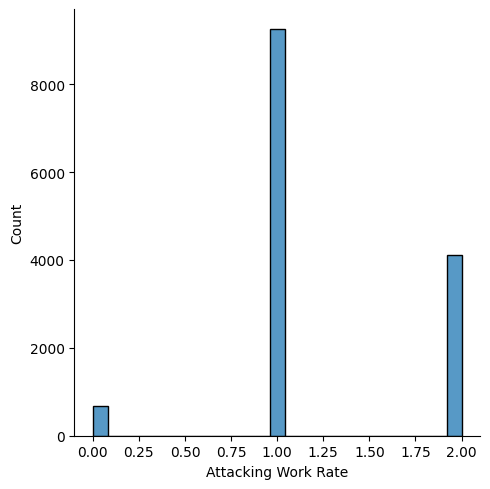

<Figure size 640x480 with 0 Axes>

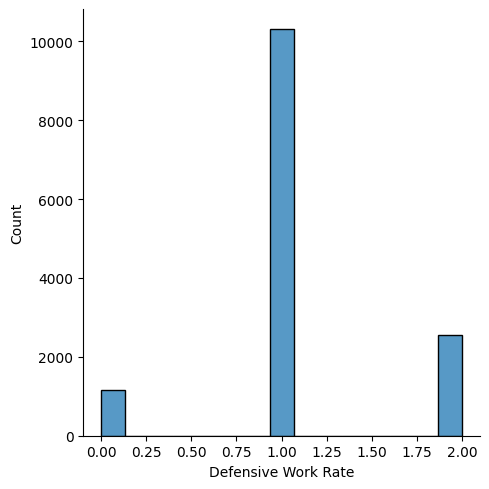

<Figure size 640x480 with 0 Axes>

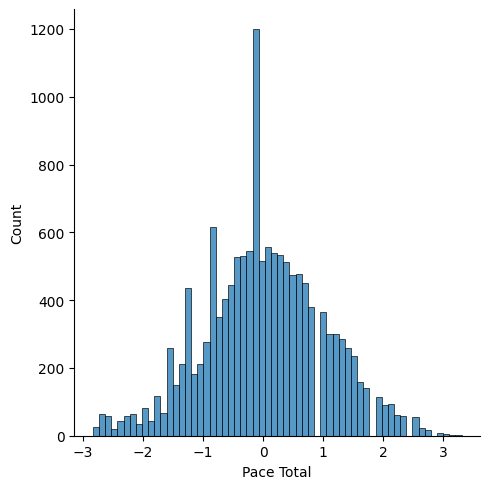

<Figure size 640x480 with 0 Axes>

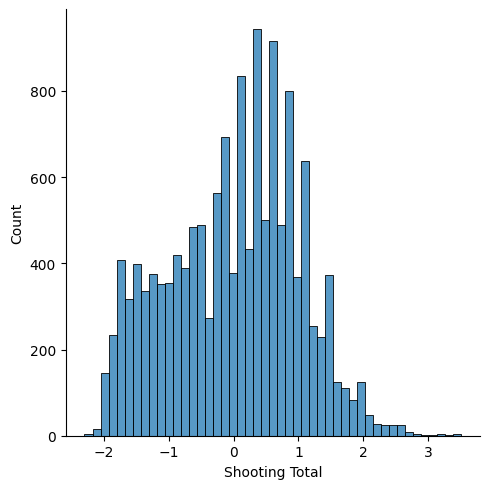

<Figure size 640x480 with 0 Axes>

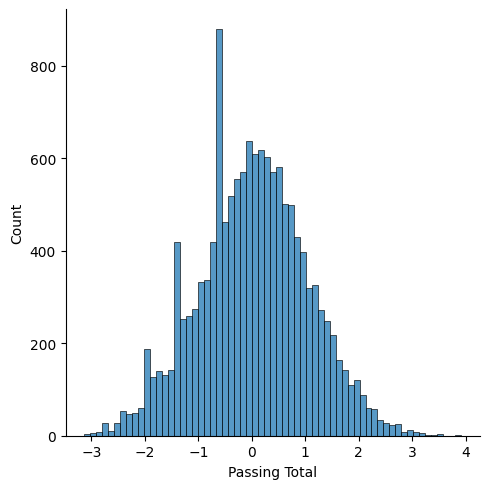

<Figure size 640x480 with 0 Axes>

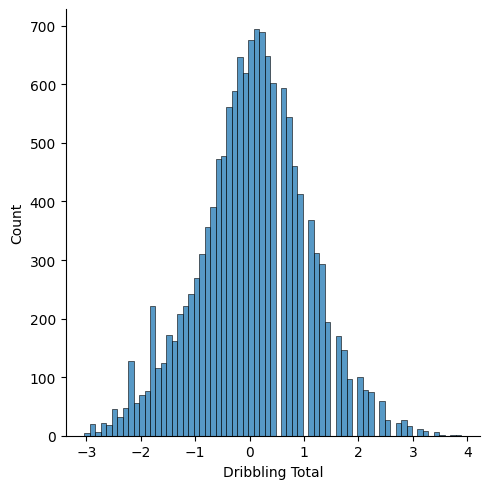

<Figure size 640x480 with 0 Axes>

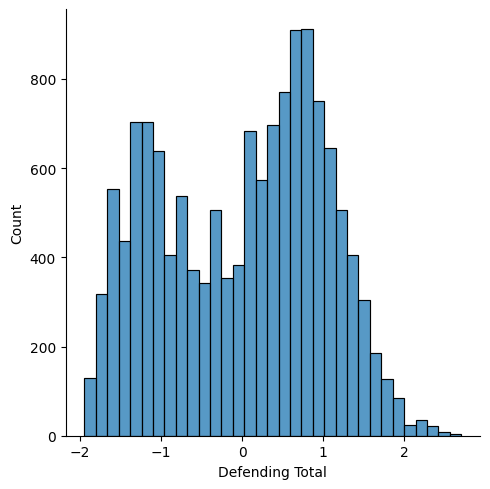

<Figure size 640x480 with 0 Axes>

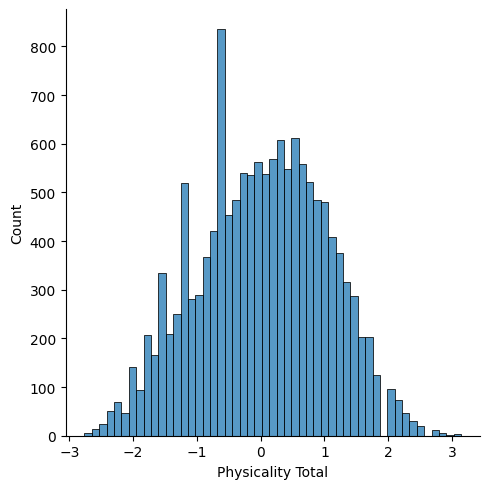

<Figure size 640x480 with 0 Axes>

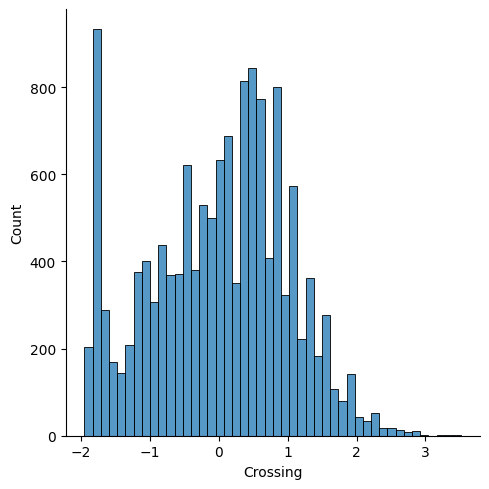

<Figure size 640x480 with 0 Axes>

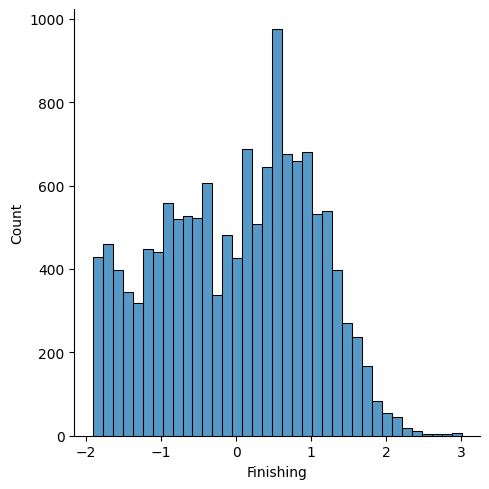

<Figure size 640x480 with 0 Axes>

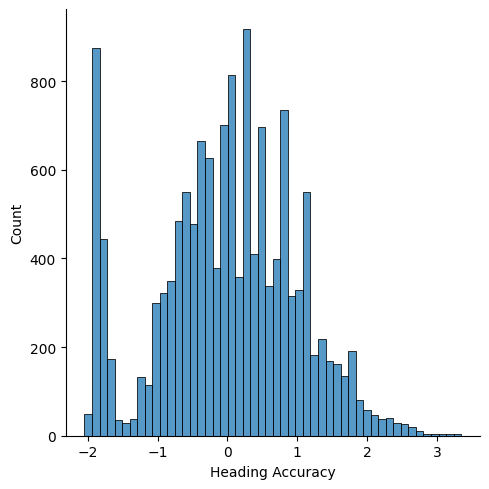

<Figure size 640x480 with 0 Axes>

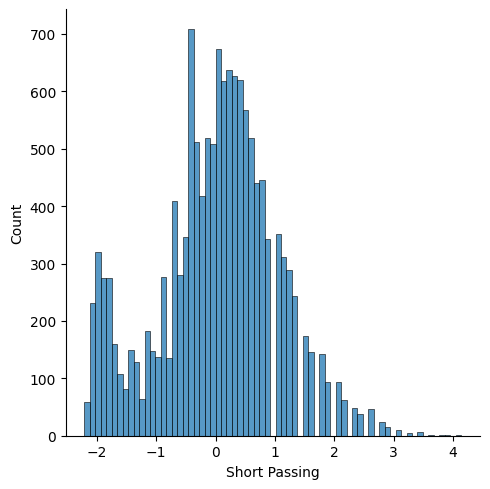

<Figure size 640x480 with 0 Axes>

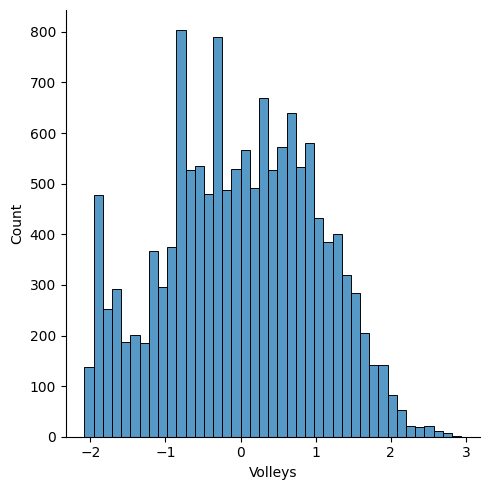

<Figure size 640x480 with 0 Axes>

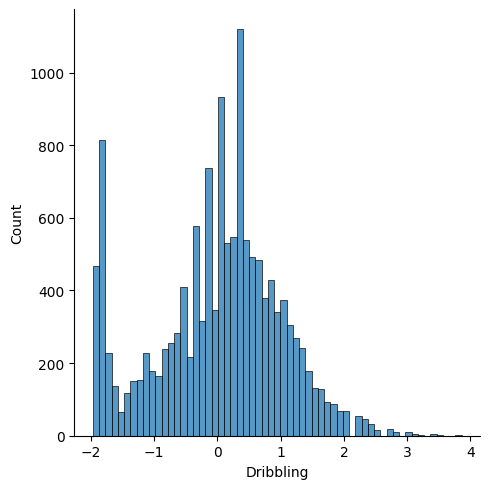

<Figure size 640x480 with 0 Axes>

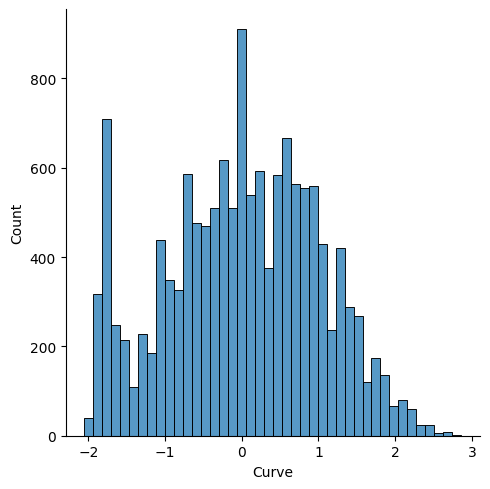

<Figure size 640x480 with 0 Axes>

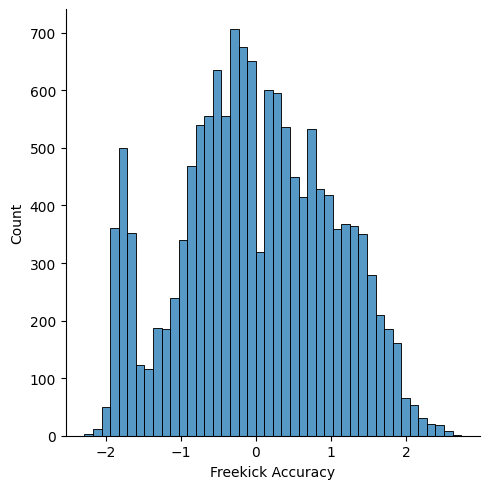

<Figure size 640x480 with 0 Axes>

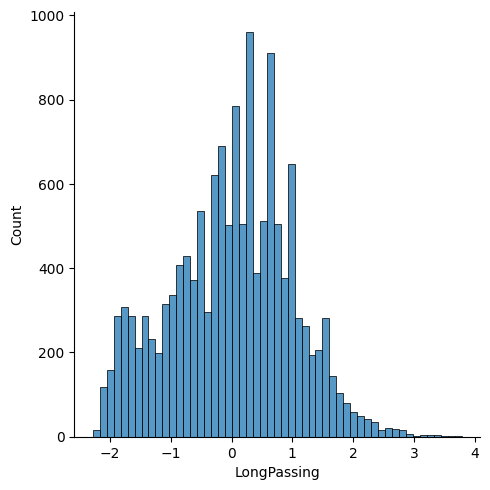

<Figure size 640x480 with 0 Axes>

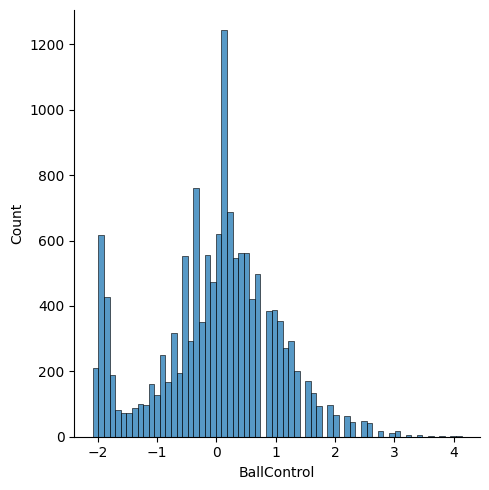

<Figure size 640x480 with 0 Axes>

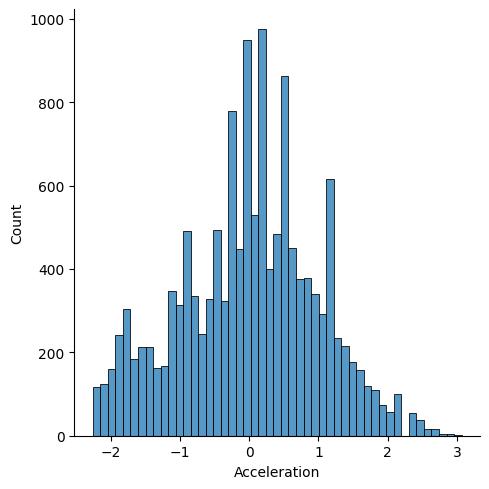

<Figure size 640x480 with 0 Axes>

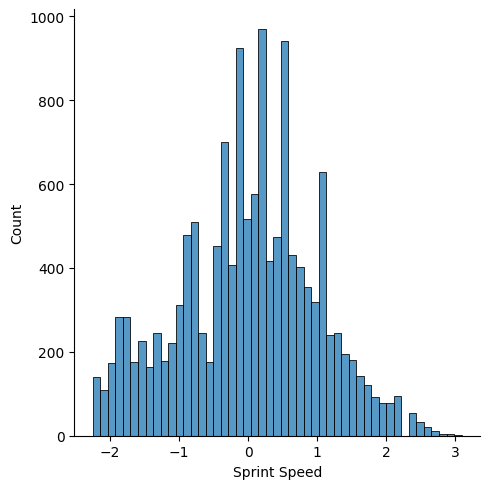

<Figure size 640x480 with 0 Axes>

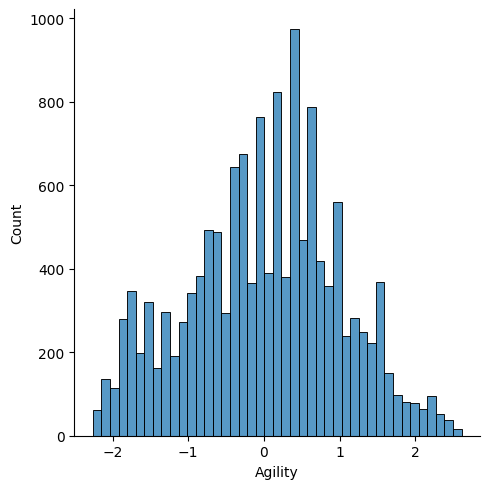

<Figure size 640x480 with 0 Axes>

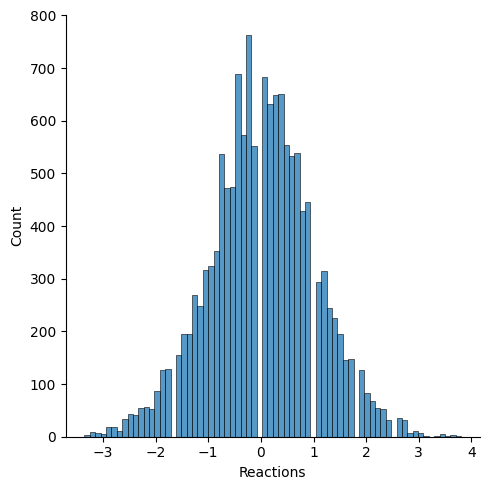

<Figure size 640x480 with 0 Axes>

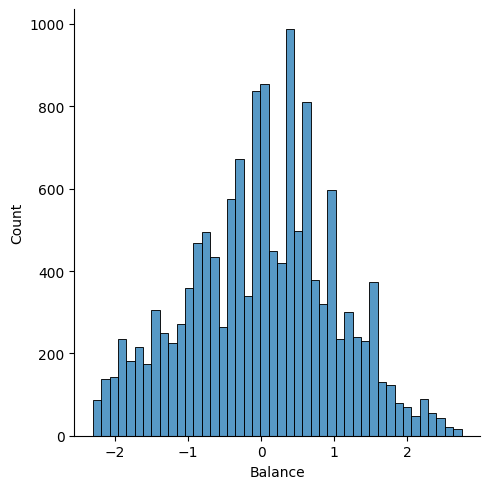

<Figure size 640x480 with 0 Axes>

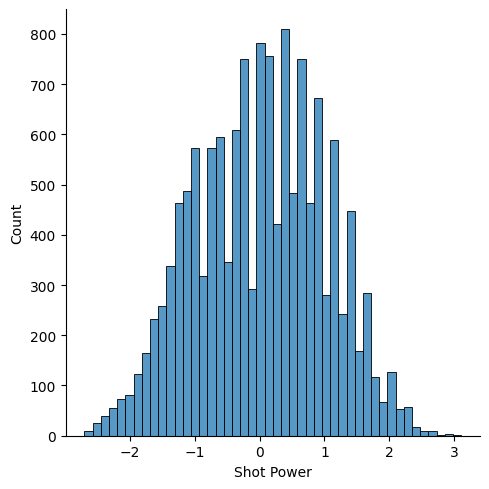

<Figure size 640x480 with 0 Axes>

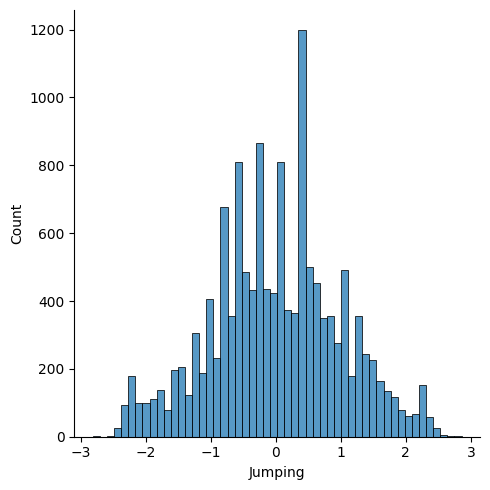

<Figure size 640x480 with 0 Axes>

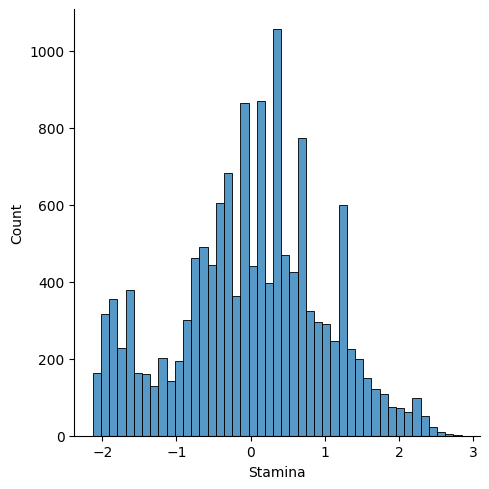

<Figure size 640x480 with 0 Axes>

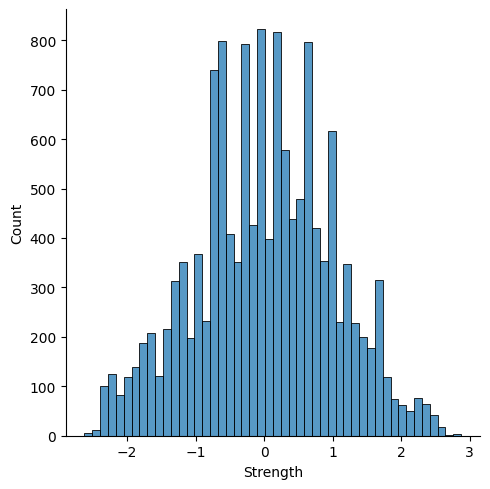

<Figure size 640x480 with 0 Axes>

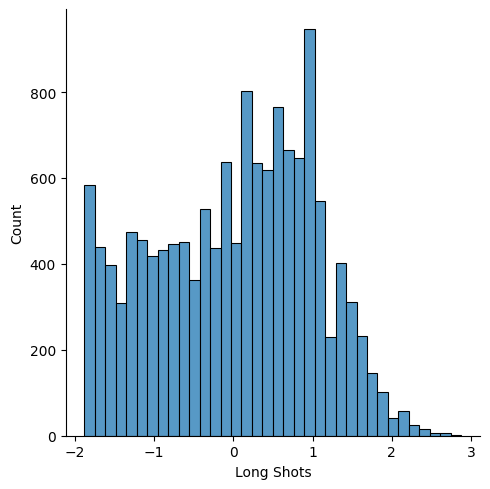

<Figure size 640x480 with 0 Axes>

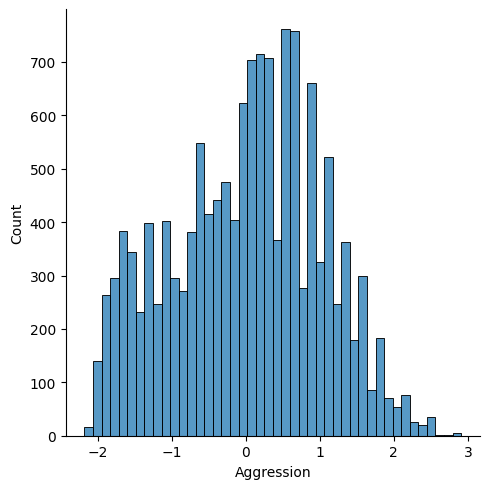

<Figure size 640x480 with 0 Axes>

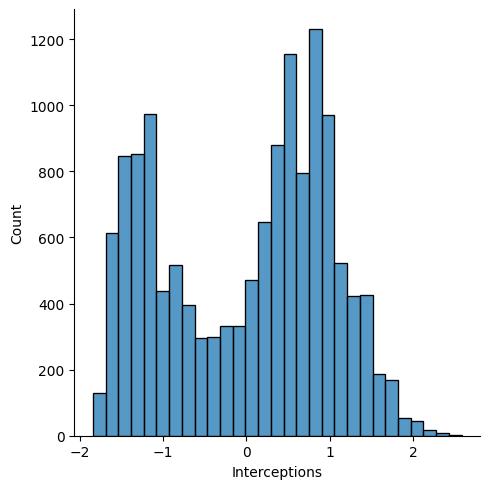

<Figure size 640x480 with 0 Axes>

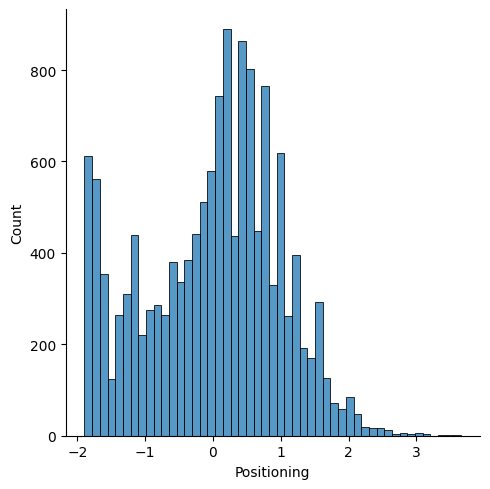

<Figure size 640x480 with 0 Axes>

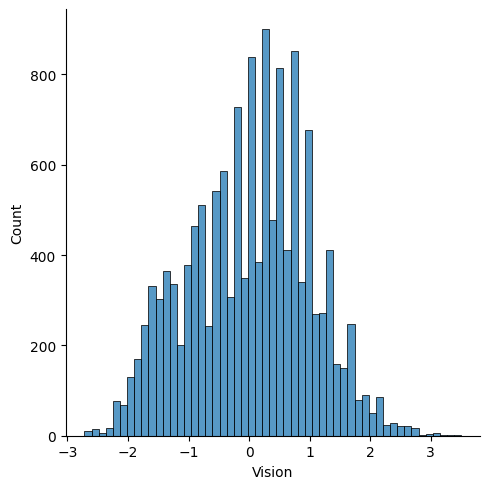

<Figure size 640x480 with 0 Axes>

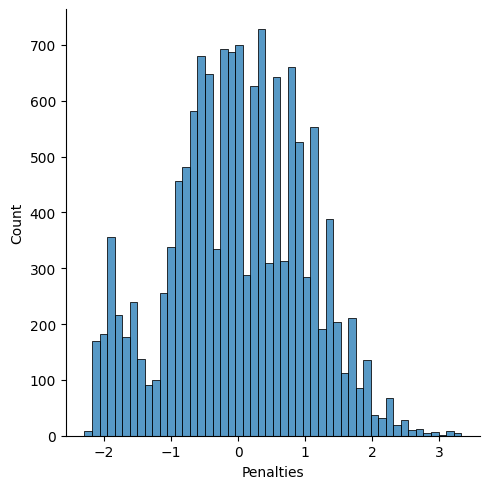

<Figure size 640x480 with 0 Axes>

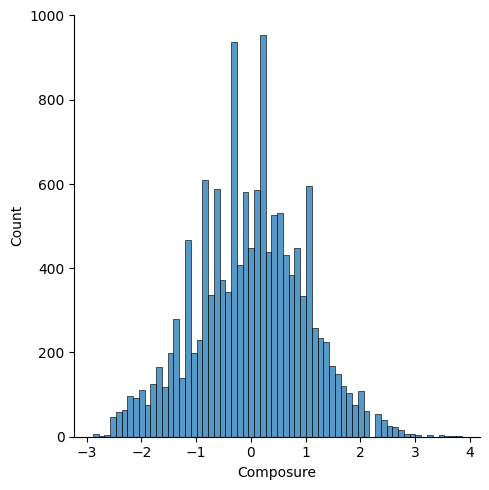

<Figure size 640x480 with 0 Axes>

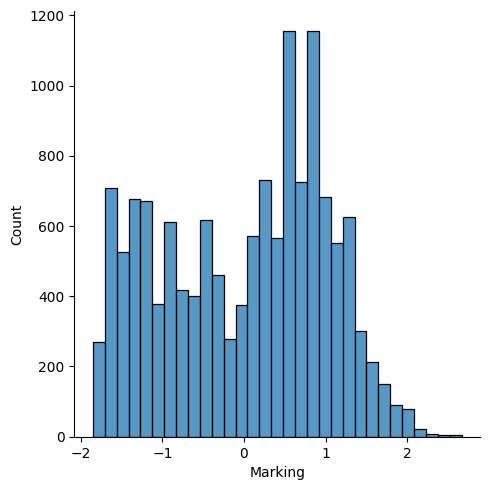

<Figure size 640x480 with 0 Axes>

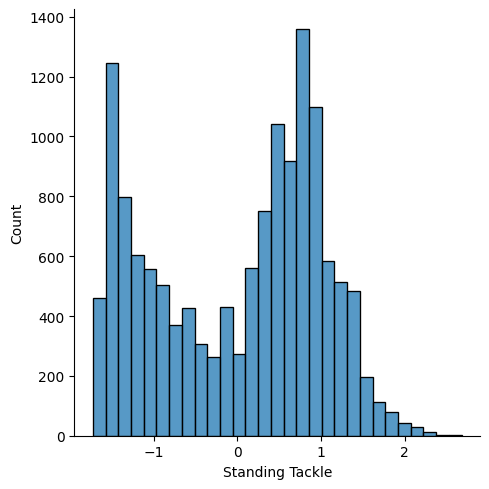

<Figure size 640x480 with 0 Axes>

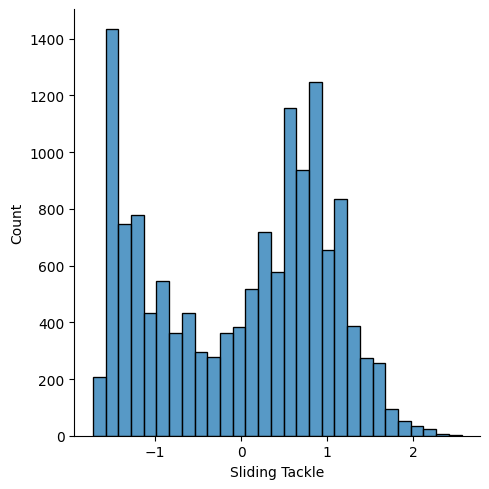

<Figure size 640x480 with 0 Axes>

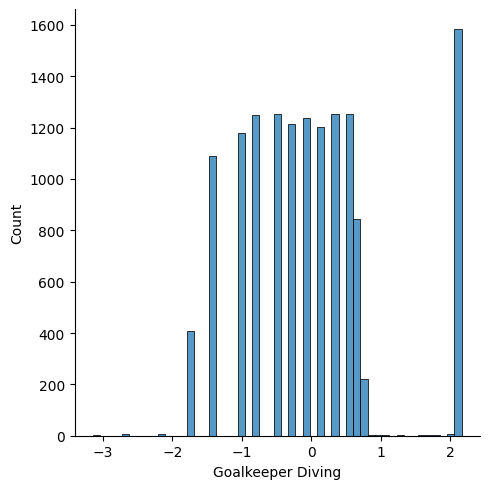

<Figure size 640x480 with 0 Axes>

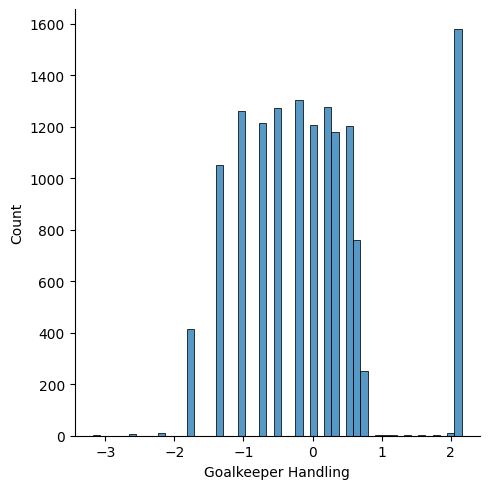

<Figure size 640x480 with 0 Axes>

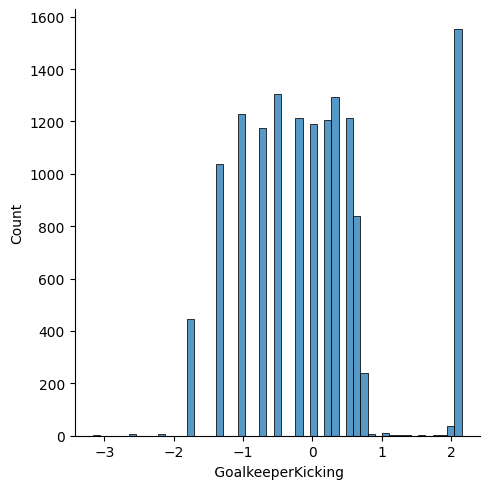

<Figure size 640x480 with 0 Axes>

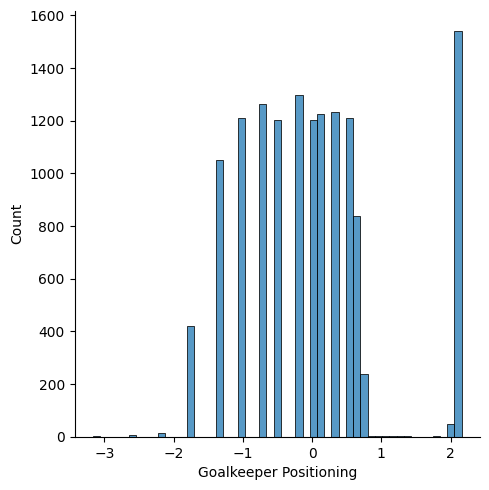

<Figure size 640x480 with 0 Axes>

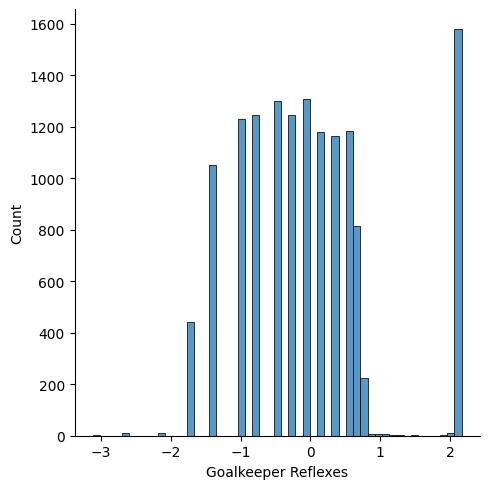

<Figure size 640x480 with 0 Axes>

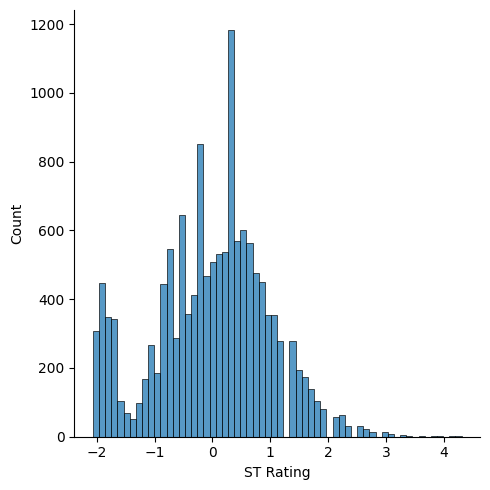

<Figure size 640x480 with 0 Axes>

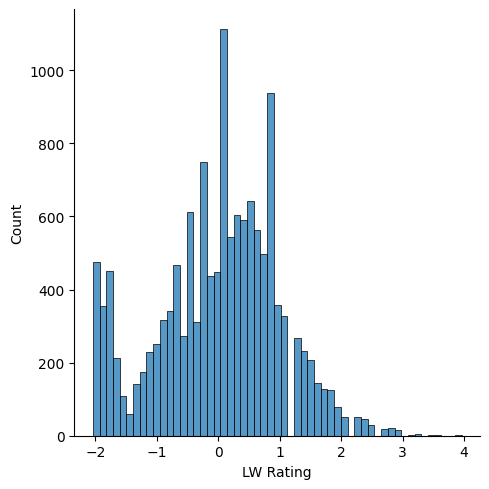

<Figure size 640x480 with 0 Axes>

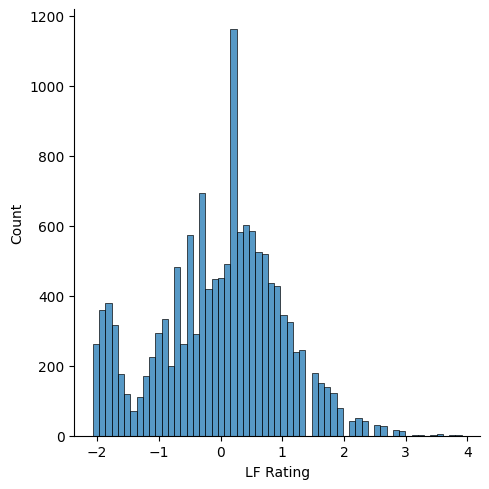

<Figure size 640x480 with 0 Axes>

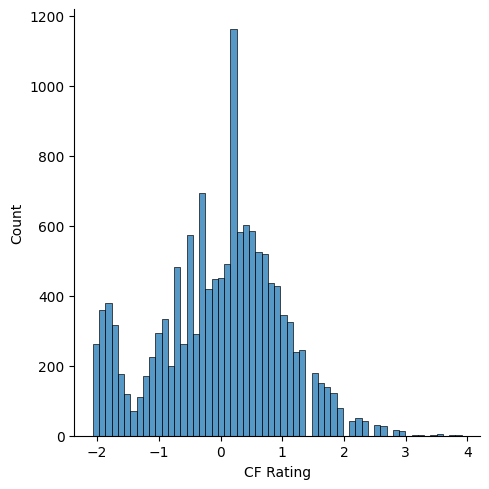

<Figure size 640x480 with 0 Axes>

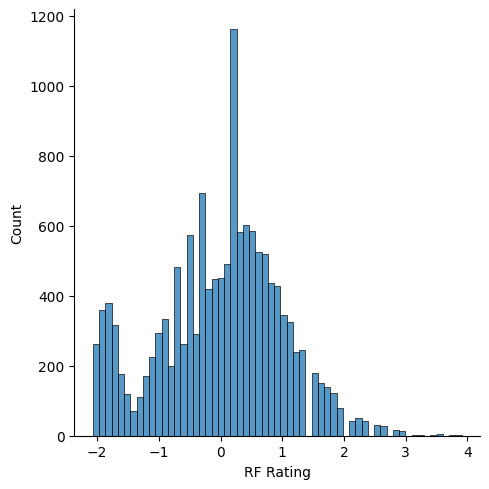

<Figure size 640x480 with 0 Axes>

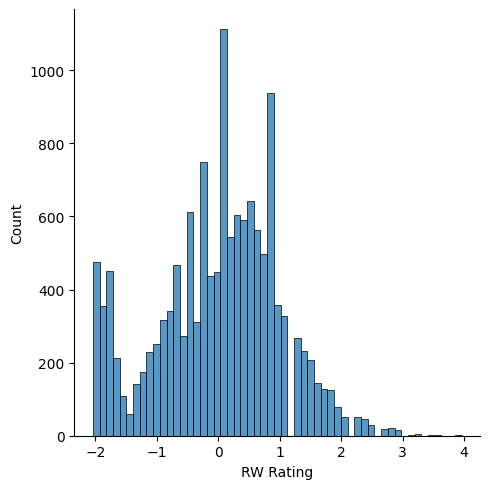

<Figure size 640x480 with 0 Axes>

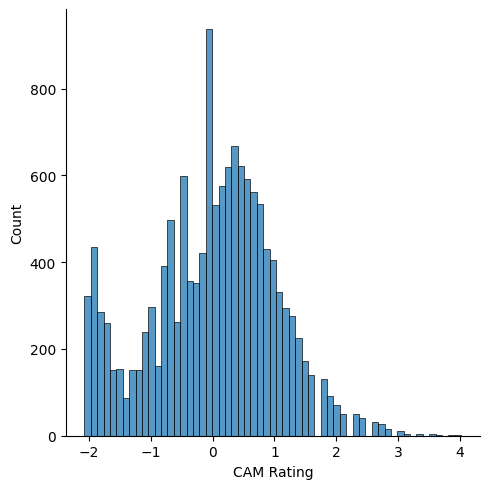

<Figure size 640x480 with 0 Axes>

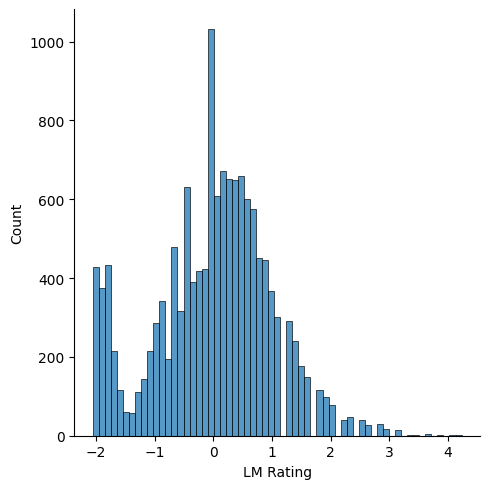

<Figure size 640x480 with 0 Axes>

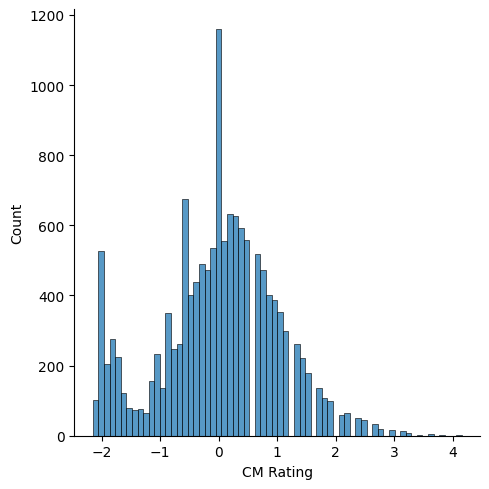

<Figure size 640x480 with 0 Axes>

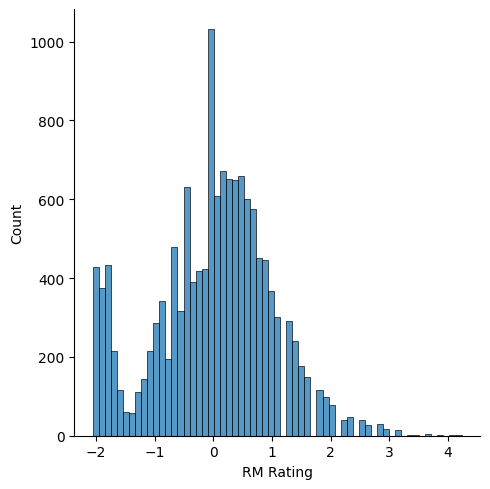

<Figure size 640x480 with 0 Axes>

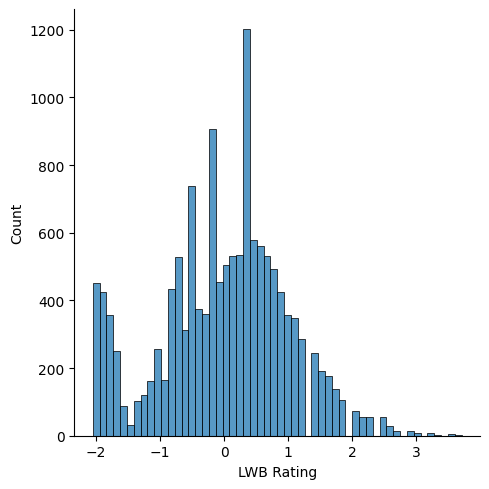

<Figure size 640x480 with 0 Axes>

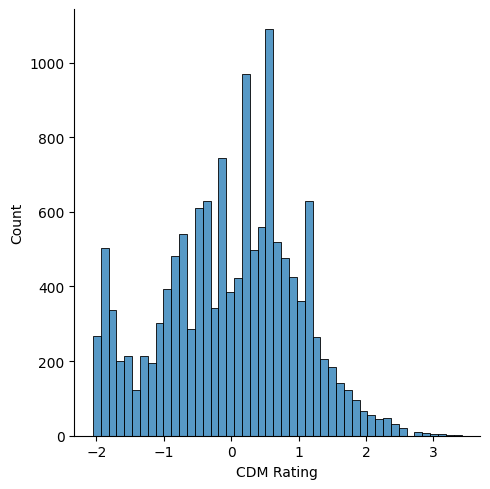

<Figure size 640x480 with 0 Axes>

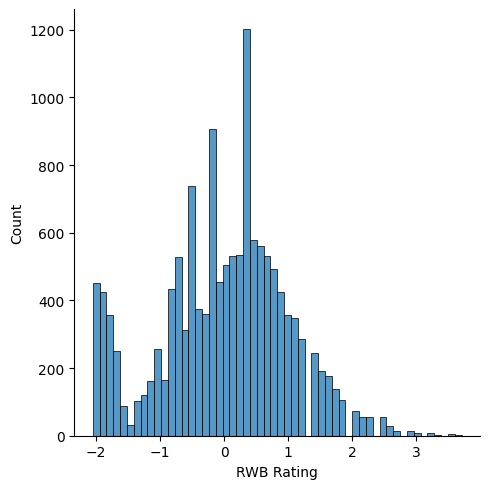

<Figure size 640x480 with 0 Axes>

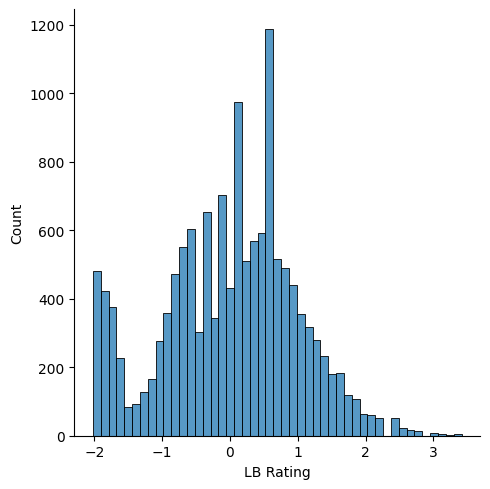

<Figure size 640x480 with 0 Axes>

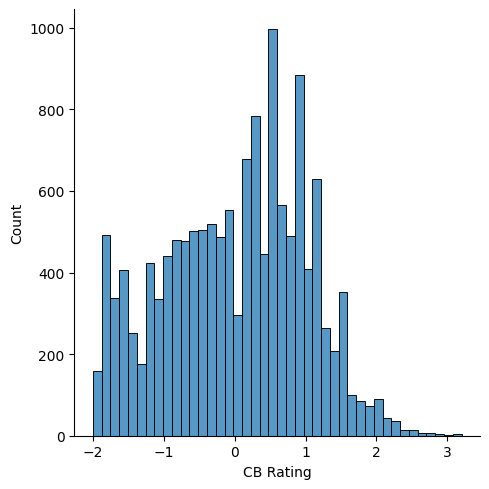

<Figure size 640x480 with 0 Axes>

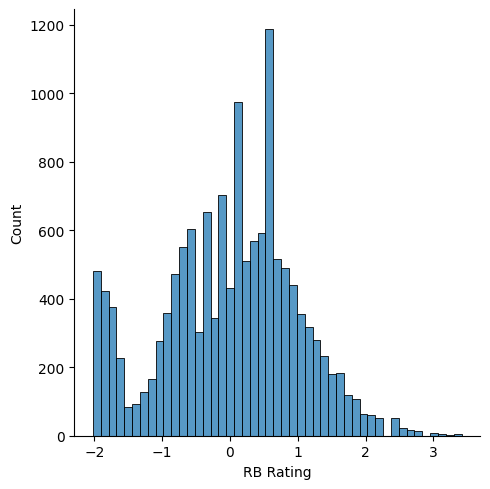

<Figure size 640x480 with 0 Axes>

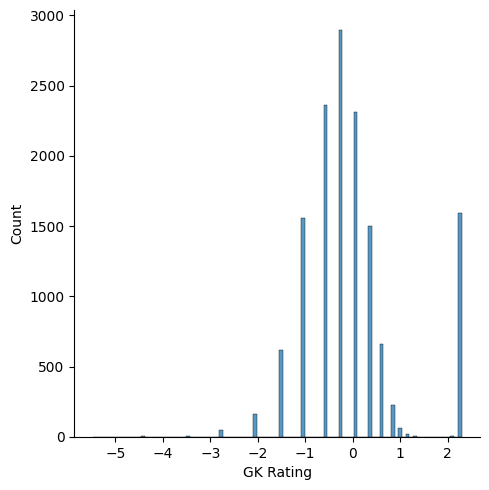

In [73]:
for col in cls_x_train.columns:
  plt.figure()
  sns.displot(data=cls_x_train, x = col)

In [74]:
ros = over_sampling.RandomOverSampler()
new_x_train, new_y_train = ros.fit_resample(cls_x_train, cls_y_train)
new_x_test, new_y_test = ros.fit_resample(cls_x_test, cls_y_test)

In [75]:
new_y_train.value_counts()

0     2761
1     2761
2     2761
3     2761
4     2761
5     2761
6     2761
7     2761
8     2761
9     2761
10    2761
11    2761
12    2761
13    2761
14    2761
dtype: int64

LDA and QDA

In [76]:
lda_clf = discriminant_analysis.LinearDiscriminantAnalysis()
lda_clf.fit(cls_x_train, cls_y_train)
print(lda_clf.score(cls_x_train, cls_y_train))
print(lda_clf.score(cls_x_test, cls_y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7111174499037296
0.7073588134626355


In [77]:
lda_clf = discriminant_analysis.LinearDiscriminantAnalysis()
lda_clf.fit(new_x_train, new_y_train)
print(lda_clf.score(new_x_train, new_y_train))
print(lda_clf.score(new_x_test, new_y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.590245080284921
0.5633522727272727


In [78]:
qda_clf = discriminant_analysis.QuadraticDiscriminantAnalysis()
qda_clf.fit(cls_x_train, cls_y_train)
print(qda_clf.score(cls_x_train, cls_y_train))
print(qda_clf.score(cls_x_test, cls_y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.6872281252228482
0.6132344552196235


In [79]:
qda_clf.fit(new_x_train, new_y_train)
print(qda_clf.score(new_x_train, new_y_train))
print(qda_clf.score(new_x_test, new_y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.6745382107931909
0.41837121212121214


Perceptron

In [80]:
clf = linear_model.Perceptron(class_weight='balanced', max_iter=2500)
model = pipeline.Pipeline([('poly', preprocessing.PolynomialFeatures(degree=2, interaction_only=False)),
                  ('classifier', clf)])
model.fit(cls_x_train, (cls_y_train.values).ravel())
print(model.score(cls_x_train, cls_y_train))
print(model.score(cls_x_test, cls_y_test))

0.7641018327034158
0.6899600684540788


In [81]:
preds = model.predict(cls_x_test)

In [82]:
cls_y_train[0].unique()

array([ 1,  9,  6,  7,  5,  2, 11,  8, 13,  4, 14,  0, 10, 12,  3])

In [83]:
print(classification_report(cls_y_test, preds))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73       439
           1       0.96      0.89      0.92       704
           2       0.76      0.71      0.73       256
           3       0.06      0.18      0.09        11
           4       0.76      0.60      0.67       209
           5       1.00      1.00      1.00       375
           6       0.32      0.28      0.30       162
           7       0.26      0.13      0.18       141
           8       0.06      0.05      0.05        41
           9       0.19      0.25      0.21        77
          10       0.29      0.25      0.27       166
          11       0.33      0.54      0.41       267
          12       0.22      0.31      0.26        55
          13       0.22      0.22      0.22        76
          14       0.96      0.90      0.93       527

    accuracy                           0.69      3506
   macro avg       0.47      0.47      0.47      3506
weighted avg       0.71   

In [84]:
clf = linear_model.Perceptron(class_weight='balanced', max_iter=2500)
model = pipeline.Pipeline([('poly', preprocessing.PolynomialFeatures(degree=2, interaction_only=False)),
                  ('classifier', clf)])
model.fit(new_x_train, (new_y_train.values).ravel())
print(model.score(cls_x_train, cls_y_train))
print(model.score(cls_x_test, cls_y_test))

0.7963345931683663
0.6911009697661152


In [85]:
clf = linear_model.Perceptron(class_weight='balanced', max_iter=2500)
model = pipeline.Pipeline([('poly', preprocessing.PolynomialFeatures(degree=2, interaction_only=True)),
                  ('classifier', clf)])
model.fit(new_x_train, (new_y_train.values).ravel())
print(model.score(cls_x_train, cls_y_train))
print(model.score(cls_x_test, cls_y_test))

0.8041788490337303
0.6930975470621791


In [86]:
clf = linear_model.Perceptron(class_weight='balanced', max_iter=2500)
model = pipeline.Pipeline([('poly', preprocessing.PolynomialFeatures(degree=2, interaction_only=True)),
                  ('classifier', clf)])
model.fit(cls_x_train, (cls_y_train.values).ravel())
print(model.score(cls_x_train, cls_y_train))
print(model.score(cls_x_test, cls_y_test))

0.7419952934464807
0.6828294352538505


ANN

In [96]:
model = Sequential([
    layers.Dense(59, activation='relu', input_dim = 59),
    layers.Dense(45, activation='relu'),
    layers.Dense(30, activation='relu'),
    layers.Dense(20, activation='relu'),
    layers.Dense(15, activation='softmax')
])

In [97]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 59)                3540      
                                                                 
 dense_11 (Dense)            (None, 45)                2700      
                                                                 
 dense_12 (Dense)            (None, 30)                1380      
                                                                 
 dense_13 (Dense)            (None, 20)                620       
                                                                 
 dense_14 (Dense)            (None, 15)                315       
                                                                 
Total params: 8,555
Trainable params: 8,555
Non-trainable params: 0
_________________________________________________________________


In [98]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [99]:
history = model.fit(cls_x_train, (cls_y_train.values).ravel(), epochs=100, validation_split=0.2)

Epoch 1/100
351/351 [==============================] - 2s 4ms/step - loss: 1.1680 - accuracy: 0.6174 - val_loss: 0.8475 - val_accuracy: 0.6848
Epoch 2/100
351/351 [==============================] - 1s 3ms/step - loss: 0.7393 - accuracy: 0.7182 - val_loss: 0.7416 - val_accuracy: 0.7052
Epoch 3/100
351/351 [==============================] - 1s 3ms/step - loss: 0.6911 - accuracy: 0.7328 - val_loss: 0.7086 - val_accuracy: 0.7205
Epoch 4/100
351/351 [==============================] - 1s 3ms/step - loss: 0.6671 - accuracy: 0.7343 - val_loss: 0.7190 - val_accuracy: 0.7155
Epoch 5/100
351/351 [==============================] - 1s 3ms/step - loss: 0.6486 - accuracy: 0.7413 - val_loss: 0.6821 - val_accuracy: 0.7258
Epoch 6/100
351/351 [==============================] - 1s 3ms/step - loss: 0.6341 - accuracy: 0.7485 - val_loss: 0.6697 - val_accuracy: 0.7415
Epoch 7/100
351/351 [==============================] - 1s 4ms/step - loss: 0.6268 - accuracy: 0.7508 - val_loss: 0.6965 - val_accuracy: 0.7258

In [91]:
y_prob = model.predict(cls_x_test)

110/110 [==============================] - 0s 1ms/step


In [92]:
y_pred = np.argmax(y_prob, axis=1)

In [93]:
y_pred

array([1, 5, 5, ..., 0, 7, 4])

In [ ]:
print(classification_report(cls_y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.85      0.79       439
           1       0.96      0.94      0.95       704
           2       0.75      0.84      0.79       256
           3       0.00      0.00      0.00        11
           4       0.73      0.82      0.77       209
           5       1.00      1.00      1.00       375
           6       0.40      0.37      0.39       162
           7       0.50      0.01      0.01       141
           8       0.18      0.15      0.16        41
           9       0.24      0.26      0.25        77
          10       0.37      0.39      0.38       166
          11       0.49      0.81      0.61       267
          12       0.38      0.05      0.10        55
          13       0.23      0.04      0.07        76
          14       0.96      0.94      0.95       527

    accuracy                           0.76      3506
   macro avg       0.53      0.50      0.48      3506
weighted avg       0.75   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM

In [ ]:
scores = []
accuracies = []
kernels = ['linear', 'poly', 'rbf']
regularization = [1,2,5, 10]
degrees = [2, 3]
for ker in kernels:
    for reg in regularization:
        if ker != 'poly':
            clf = skl.svm.SVC(kernel=ker, class_weight='balanced', C=reg)
            clf.fit(cls_x_train, (cls_y_train.values).ravel())
            preds = clf.predict(cls_x_test)
            accuracy = accuracy_score(cls_y_test, preds)
            accuracies.append(accuracy)
            print("Kernel : {}, Regularization : {}".format(ker, reg))
            score = clf.score(cls_x_train, cls_y_train)
            scores.append(score)
        else:
            for deg in degrees:
                clf = skl.svm.SVC(kernel=ker, class_weight='balanced', degree=deg, C=reg)
                clf.fit(cls_x_train, (cls_y_train.values).ravel())
                preds = clf.predict(cls_x_test)
                accuracy = accuracy_score(cls_y_test, preds)
                accuracies.append(accuracy)
                print("Kernel : {}, Regularization : {}, Degree : {}".format(ker, reg, deg))
                score = clf.score(cls_x_train, cls_y_train)
                scores.append(score)

In [ ]:
scores

KNN

In [ ]:
weighted_accuracies = []
non_weight_accuracy = []

In [ ]:
for i in range(int((cls_x_train.shape[0])**(1/2) - (1/4)*(cls_x_train.shape[0])**(1/2)) + 1, int((cls_x_train.shape[0])**(1/2) + (1/4)*(cls_x_train.shape[0])**(1/2)) - 1):
    knn = skl.neighbors.KNeighborsClassifier(n_neighbors=i, weights='uniform')
    knn.fit(cls_x_train, (cls_y_train.values).ravel())
    preds = knn.predict(cls_x_test)
    accuracy = accuracy_score(cls_y_test, preds)
    non_weight_accuracy.append(accuracy)

In [ ]:
for i in range(int((cls_x_train.shape[0])**(1/2) - (1/4)*(cls_x_train.shape[0])**(1/2)) + 1, int((cls_x_train.shape[0])**(1/2) + (1/4)*(cls_x_train.shape[0])**(1/2)) - 1):
    knn = skl.neighbors.KNeighborsClassifier(n_neighbors=i, weights='distance')
    knn.fit(cls_x_train, (cls_y_train.values).ravel())
    preds = knn.predict(cls_x_test)
    accuracy = accuracy_score(cls_y_test, preds)
    weighted_accuracies.append(accuracy)

In [ ]:
oversampled = []

In [ ]:
for i in range(int((cls_x_train.shape[0])**(1/2) - (1/4)*(cls_x_train.shape[0])**(1/2)) + 1, int((cls_x_train.shape[0])**(1/2) + (1/4)*(cls_x_train.shape[0])**(1/2)) - 1):
    knn = skl.neighbors.KNeighborsClassifier(n_neighbors=i, weights='uniform')
    knn.fit(new_x_train, (new_y_train.values).ravel())
    preds = knn.predict(cls_x_test)
    accuracy = accuracy_score(cls_y_test, preds)
    oversampled.append(accuracy)

Descicsion Tree

In [ ]:
clf = model_selection.GridSearchCV(tree.DecisionTreeClassifier(), {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [5, 7, 10, 15, None],
    'min_samples_leaf' : [5, 7, 10, 15, None]
}, cv=5, n_jobs=-1)

In [ ]:
clf.fit(cls_x_train, cls_y_train)

In [ ]:
clf.best_params_

In [ ]:
clf.best_estimator_

In [ ]:
clf.best_score_

In [ ]:
results = clf.cv_results_

In [ ]:
results = pd.DataFrame(results)

In [ ]:
results

Bagging

Using Perceptron

In [ ]:
clf = linear_model.Perceptron(class_weight='balanced', max_iter=2500)
model = pipeline.Pipeline([('poly', preprocessing.PolynomialFeatures(degree=2, interaction_only=True)),
                  ('classifier', clf)])
bag_clf = model_selection.GridSearchCV(ensemble.BaggingClassifier(estimator=model, n_jobs=-1), {
    'n_estimators' : [4, 7, 10, 15],
    'max_samples' : [0.25, 0.3, 0.4, 0.5],
}, n_jobs=-1)

In [ ]:
bag_clf.fit(cls_x_train, (cls_y_train.values).ravel())

In [ ]:
results = bag_clf.cv_results_

In [ ]:
results_df = pd.DataFrame(results)

In [ ]:
bag_clf.best_score_

In [ ]:
bag_clf.best_estimator_

In [ ]:
bag_clf.best_params_

In [ ]:
results_df

In [ ]:
bag_clf = model_selection.GridSearchCV(ensemble.BaggingClassifier(estimator=linear_model.Perceptron(), n_jobs=-1, bootstrap_features=True), {
    'n_estimators' : [10, 15],
    'max_samples' : [0.4, 0.5],
    'max_features' : [0.5, 0.7, 0.8]
}, n_jobs=-1)

In [ ]:
bag_clf.fit(cls_x_train, (cls_y_train.values).ravel())

In [ ]:
bag_clf.best_score_

Using Descision Tree

In [ ]:
clf = model_selection.GridSearchCV(ensemble.BaggingClassifier(n_jobs=-1, bootstrap_features=True), {
    'n_estimators' : [10, 15],
    'max_samples' : [0.4, 0.5],
    'max_features' : [0.5, 0.7, 0.8]
})

In [ ]:
clf.fit(cls_x_train, (cls_y_train.values).ravel())